# 📀 **Capstone Project: AI-Powered Rainfall Prediction for High-Impact Decision Making**



##    **1️⃣ Business Understanding & Problem Statement**

### 🌍 **Context & Motivation**
Accurate rainfall prediction plays a pivotal role across various sectors, including agriculture, disaster preparedness, and urban planning. In agriculture, timely and precise forecasts are essential to avoid crop losses, while in urban planning, accurate predictions help mitigate the risk of flooding and infrastructure damage. Additionally, accurate rainfall predictions support disaster preparedness by allowing authorities to take proactive measures, reducing economic and social disruptions. 

Traditional weather prediction models often rely on rigid, rule-based systems that struggle to account for the complex, non-linear relationships between meteorological variables. This limitation frequently results in less reliable forecasts and missed opportunities for early intervention.

### 🔖 **Project Challenge & Competitive Edge**

This project seeks to address these challenges by adopting a modern, AI-driven approach to rainfall prediction. Through the use of advanced machine learning techniques, we aim to develop a high-accuracy binary classification model that can predict rainfall occurrence with unprecedented precision, ultimately improving decision-making across multiple critical sectors.

---

### 💪 **Strategic Value**

#### 1. **Farmers & Agribusiness**  
- **Optimizing Irrigation Schedules**:  
  Leveraging AI-driven rainfall predictions allows farmers to fine-tune irrigation schedules based on more accurate and localized forecasts. This ensures optimal water usage, reduces costs, and improves crop yields.  
- **Reducing Crop Loss Risk**:  
  AI-powered rainfall models enable early warnings for extreme weather events, helping farmers mitigate crop damage from unexpected rainfall, droughts, or floods, and adapt to changing climate patterns.

#### 2. **Disaster Management**  
- **Enhancing Flood Forecasting**:  
  AI algorithms, combined with real-time rainfall data, enhance flood forecasting capabilities, enabling better preparedness and timely evacuation plans to protect lives and property from flood risks.  
- **Emergency Preparedness**:  
  With AI-powered rainfall predictions, disaster response teams can be better equipped to allocate resources based on anticipated rainfall patterns, improving response times and the effectiveness of relief efforts.

#### 3. **Urban Infrastructure**  
- **Optimizing Drainage Systems**:  
  AI-driven rainfall forecasting assists city planners in managing urban drainage systems more efficiently. It predicts heavy rainfall events, ensuring that drainage infrastructure is prepared to handle peak water flows, reducing the risk of urban flooding.  
- **Water Resource Management**:  
  By using AI to predict rainfall patterns and water availability, cities can better manage water resources, optimize storage and distribution, and plan for future water demands, ensuring sustainability in urban water management.

#### 4. **Sustainability & Climate Adaptation**  
- **Enhancing Climate Resilience**:  
  AI-powered rainfall predictions support climate adaptation strategies by providing more accurate insights into weather trends, enabling industries and governments to plan for and mitigate the effects of extreme weather events on ecosystems and infrastructure.  
- **Promoting Efficient Resource Use**:  
  By integrating AI predictions with real-time data, industries can optimize their water and resource consumption, reduce waste, and contribute to more sustainable operations.

---

## **2️⃣ Project Objectives & Key Performance Indicators (KPIs)**

### 🎯 **Primary Objective**
- **Develop a High-Accuracy Rainfall Prediction Model**  
  Create a machine learning model for binary classification to predict rainfall occurrence. The model will output:
  - Rain = 1
  - No Rain = 0

---  

### 📈 **Secondary Objectives**

#### 1. **Investigate underlying weather patterns that influence rainfall**  
    - Analyze key features such as temperature, humidity, wind speed, and pressure to understand their relationship with rainfall.

#### 2. **Implement and test various machine learning algorithms (e.g., Logistic Regression, Decision Trees, Random Forest, XGBoost, etc.).**  
   - Enhance the dataset with high-impact features and variables, transforming raw data into meaningful inputs that improve model performance.

#### 3. **Showcase a comprehensive, end-to-end AI-driven workflow that can be adopted for real-world weather forecasting applications**  
   -   Ensure the model is applicable to both academic research and industry use cases.

---




## **3️⃣ Data Understanding & Competitive Dataset Analysis**

### 📚 **Dataset Source & Overview**
This project is based on Kaggle’s Playground Series - S5E3 competition dataset, consisting of historical meteorological data designed to challenge participants in predictive modeling.


### 🔄 **Dataset Breakdown**
- **Train Dataset (train.csv)**: 2,190 samples with 13 features.
- **Test Dataset (test.csv)**: 730 samples with 12 features (excludes rainfall target variable).
- **Submission File (sample_submission.csv)**: Kaggle’s submission format for predicted outputs.

### 🎯 **Feature Engineering Considerations**

| Feature       | Description & Significance                                                                 |
|---------------|--------------------------------------------------------------------------------------------|
| **day**       | Sequential identifier (potential time-series dependencies).                               |
| **pressure**  | Atmospheric pressure, influencing rainfall patterns.                                       |
| **maxtemp**   | Maximum recorded temperature, a potential indicator of precipitation likelihood.           |
| **temperature** | Average recorded temperature, linked to evaporation and condensation cycles.             |
| **mintemp**   | Minimum temperature, useful for analyzing dew point variations.                            |
| **dewpoint**  | Key metric for moisture content in the air.                                                |
| **humidity**  | Relative humidity (%), highly correlated with rainfall probability.                        |
| **cloud**     | Cloud cover percentage (%), a strong predictor for precipitation.                          |
| **sunshine**  | Total hours of sunshine, inversely affecting rainfall chances.                             |
| **winddirection** | Wind direction, impacting weather system movements.                                   |
| **windspeed** | Wind speed, affecting cloud formation and storm intensity.                                |
| **rainfall**  | Target Variable (1 = Rain, 0 = No Rain).                                                   |


🔗 **GitHub Repository**: [https://github.com/Otim135/PHASE_5_CAPSTONE_PROJECT]



In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from scipy.stats import f_oneway,ttest_ind

import xgboost as xgb
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
import joblib

### 🔄 Step 1: Imports & Setup - Summary
**📌 What Happened?**  
Imported core libraries for data handling, visualization, machine learning models, and pipeline creation.  
**📊 Key Output:**  
All necessary packages loaded successfully.  
**💡 Why It Matters?**  
These libraries provide the tools needed to build, evaluate, and visualize models effectively.

In [75]:
df_train = pd.read_csv('./Data/train.csv')
df_test = pd.read_csv('./Data/test.csv')

print("Train Sample:")
display(df_train.head())
print("Test Sample:")
display(df_test.head())

print(f"Train shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}")

Train Sample:


id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1  
1   91.0       0.0           50.0       21.9         1  
2   47.0       8.3           70.0       18.1         1  
3   95.0       0.0           60.0       35.6         1  
4   45.0       3.6           40.0       24.8         0

Test Sample:


id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0  2190    1    1019.5     17.5         15.8     12.7      14.9      96.0   
1  2191    2    1016.5     17.5         16.5     15.8      15.1      97.0   
2  2192    3    1023.9     11.2         10.4      9.4       8.9      86.0   
3  2193    4    1022.9     20.6         17.3     15.2       9.5      75.0   
4  2194    5    1022.2     16.1         13.8      6.4       4.3      68.0   

   cloud  sunshine  winddirection  windspeed  
0   99.0       0.0           50.0       24.3  
1   99.0       0.0           50.0       35.3  
2   96.0       0.0           40.0       16.9  
3   45.0       7.1           20.0       50.6  
4   49.0       9.2           20.0       19.4

Train shape: (2190, 13)
Test shape: (730, 12)


### 🔄 Step 2: Load and Preview Data - Summary
**📌 What Happened?**  
Loaded training and testing datasets and displayed the first few rows.  
**📊 Key Output:**  
Train shape: (2190, 13); Test shape: (730, 12)  
**💡 Why It Matters?**  
Confirming structure and sample data ensures everything is ready for preprocessing.

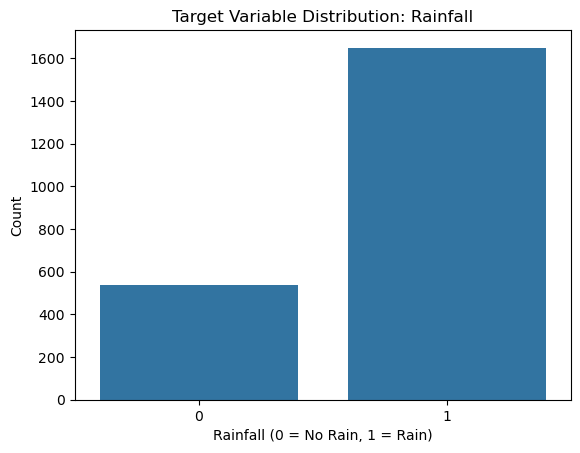

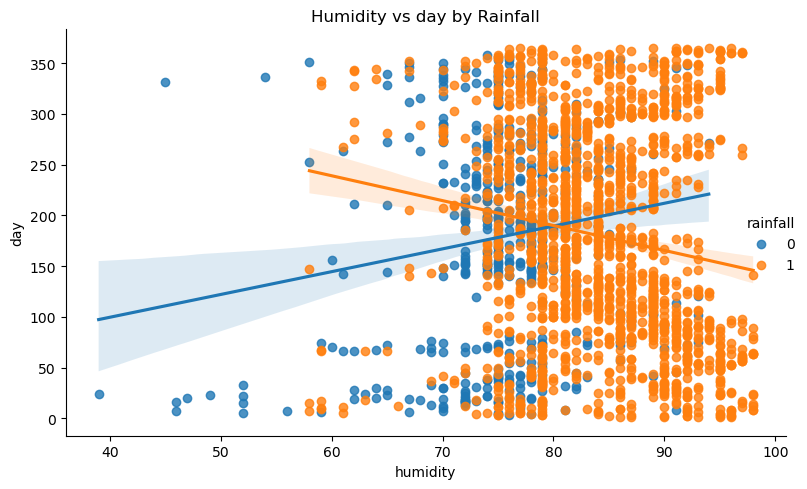

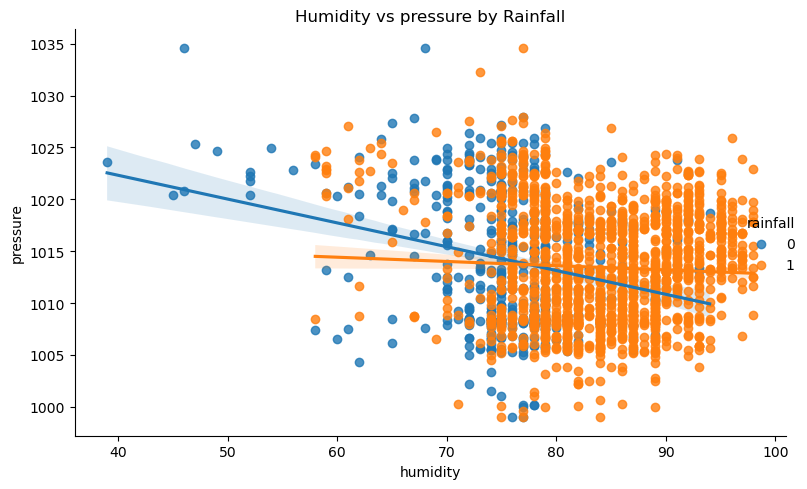

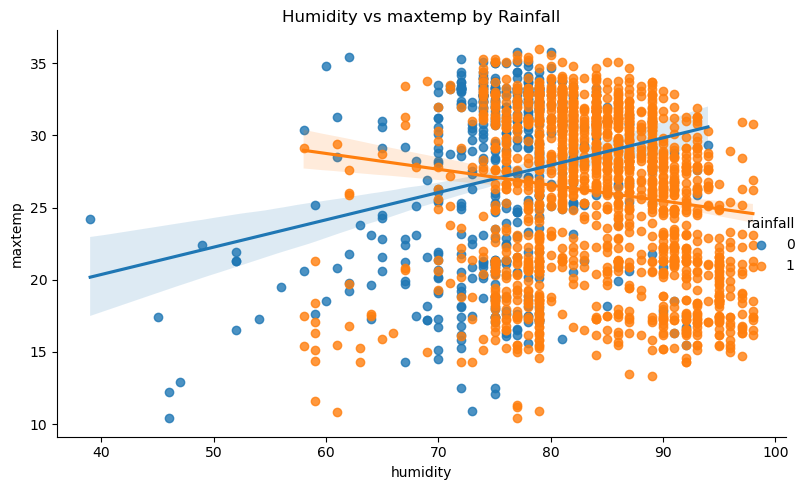

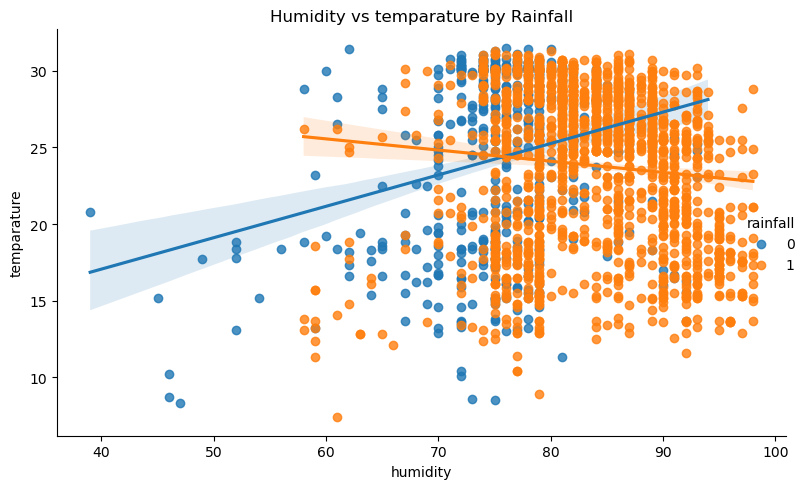

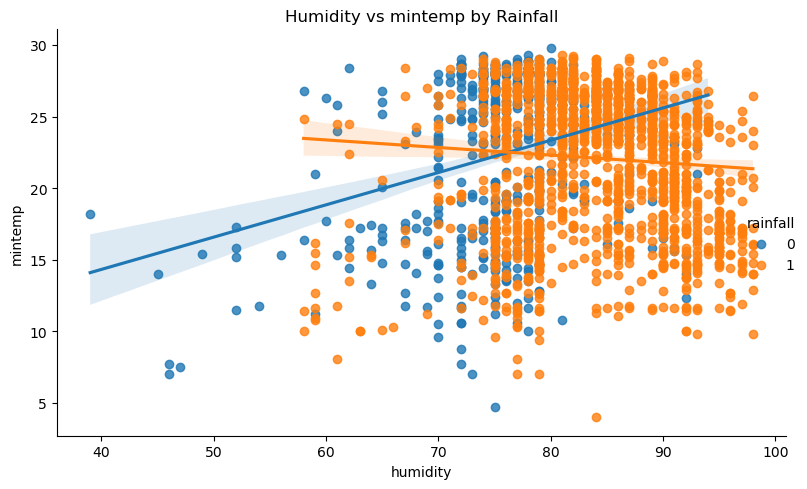

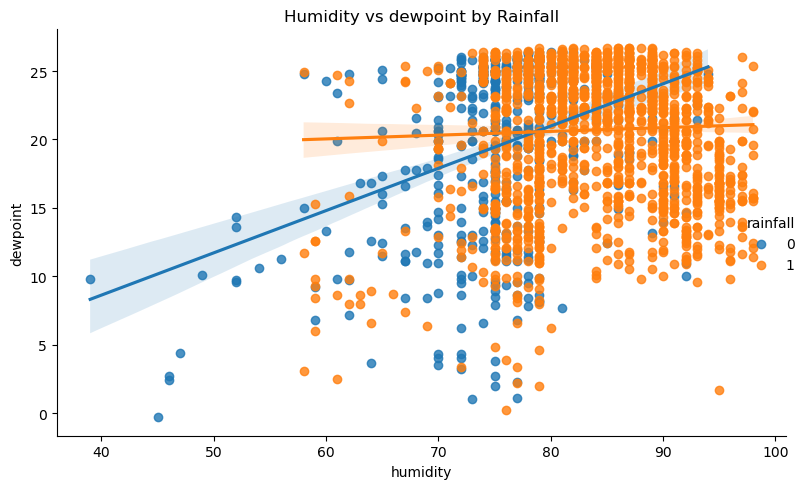

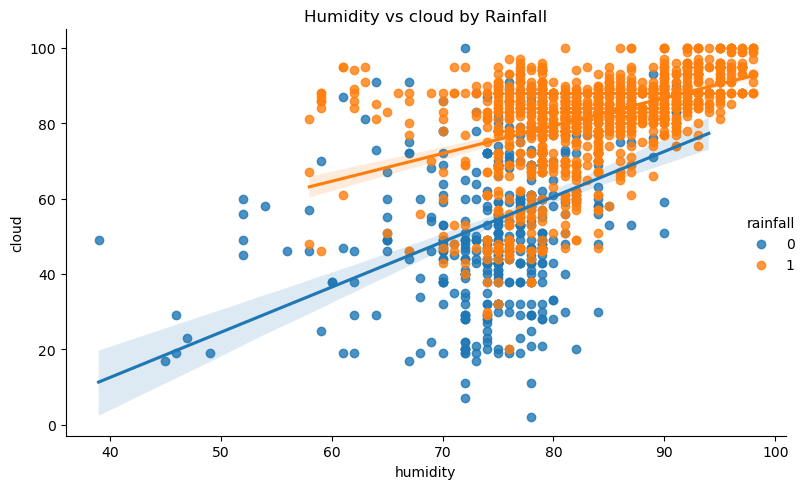

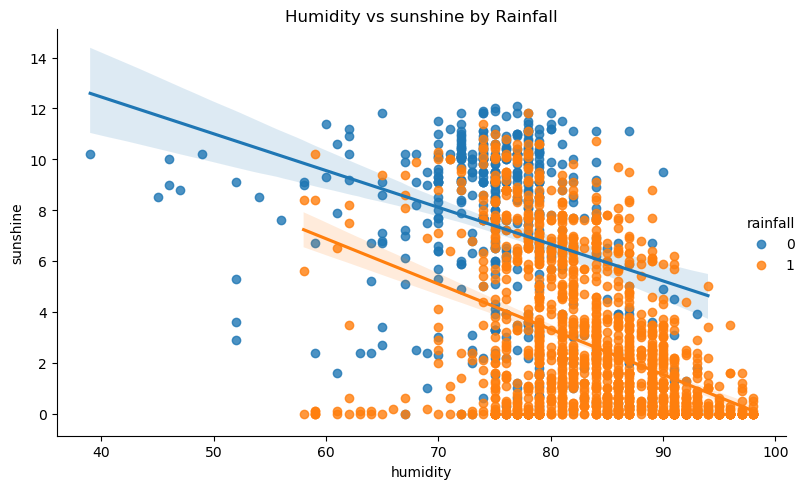

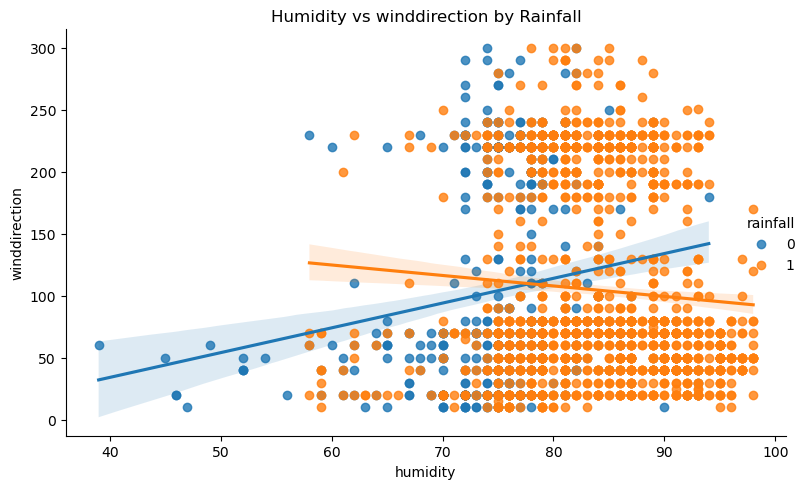

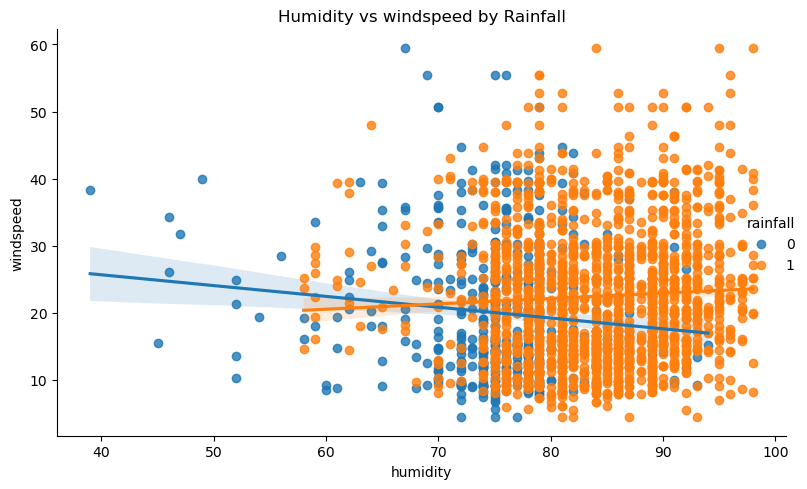

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB
None
                id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.94

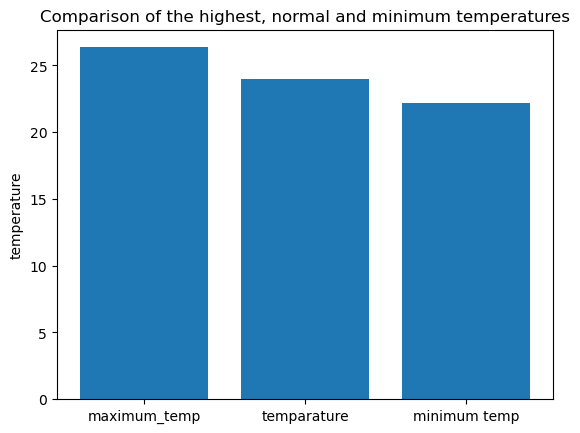

In [76]:
df_eda = pd.read_csv('./Data/train.csv')
sns.countplot(x='rainfall', data=df_eda)
plt.title("Target Variable Distribution: Rainfall")
plt.xlabel("Rainfall (0 = No Rain, 1 = Rain)")
plt.ylabel("Count")
plt.show()

# Correlation plots: humidity vs other variables
correlating_features = df_eda.drop(columns=['id', 'rainfall', 'humidity'])
for feature in correlating_features.columns:
    sns.lmplot(x='humidity', y=feature, hue='rainfall', data=df_eda, aspect=1.5)
    plt.title(f'Humidity vs {feature} by Rainfall')
    plt.tight_layout()
    plt.show()

# Temperature comparison and statistical test
x = ('maximum_temp','temparature','minimum temp')
y = (df_train['maxtemp'].mean(),
     df_train['temparature'].mean(),
     df_train['mintemp'].mean())
fig,ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('temperature')
ax.set_title('Comparison of the highest, normal and minimum temperatures');


from scipy.stats import f_oneway

def Decision(test_results):
    if test_results[1] > 0.05:
        return f'''We fail to reject the null hypothesis,
        since p:{test_results[1]} is greater than 0.05.
        There is no significant difference in the sample means'''
    else:
        return f'''We reject the null hypothesis,
        since p:{test_results[1]} is less than 0.05.
        There is a significant difference in the sample means'''

anovatest_results = f_oneway(df_train['maxtemp'],
                             df_train['temparature'],
                             df_train['mintemp'])
Decision(anovatest_results)

# Check data types
print(df_train.info())

# Summary statistics
print(df_train.describe())

# Check for missing values
print("Missing in Train:\n", df_train.isnull().sum())
print("Missing in Test:\n", df_test.isnull().sum())


### 🔄 Step 3: Data Cleaning & EDA - Summary
**📌 What Happened?**  
Visualized target distribution and checked for missing values.  
**📊 Key Output:**  
Imbalance observed in rainfall classes; no missing values in train, 1 in test.  
**💡 Why It Matters?**  
Class imbalance affects model training. Null values can cause model failures if not handled.

### 🔄 Step 3a: Dataset Summary & Null Check - Summary
**📌 What Happened?**  
Inspected data types, descriptive statistics, and null values for both training and test datasets.  
**📊 Key Output:**  
- Confirmed numeric types for all columns.
- No missing values in train set; 1 null in test set.
**💡 Why It Matters?**  
Ensures the data is ready for modeling and alerts us to any preprocessing needs.

### 🔄 Step 3b: Temperature Comparison & ANOVA Test - Summary
**📌 What Happened?**  
Plotted a bar chart comparing mean values of max, average, and minimum temperature. Then used one-way ANOVA to statistically test if differences in the means are significant.  
**📊 Key Output:**  
- Mean values for maxtemp, temparature, and mintemp visualized.  
- ANOVA test result indicating if the differences are statistically significant.  
**💡 Why It Matters?**  
Understanding variance across key temperature metrics helps validate assumptions and guides feature selection.

### 🔄 Step 3c: Correlation Patterns Between Humidity and Other Features - Summary
**📌 What Happened?**  
Plotted scatter plots with linear regression lines to explore how humidity correlates with other meteorological features, segmented by rainfall outcome.  
**📊 Key Output:**  
Visual diagnostic of relationships between humidity and features like temperature, cloud cover, windspeed, etc.  
**💡 Why It Matters?**  
Understanding linear correlations helps in identifying predictive relationships and potential feature interactions for rainfall classification.

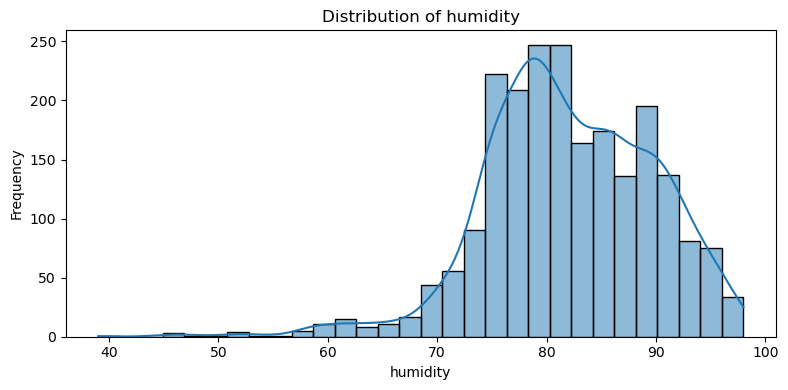

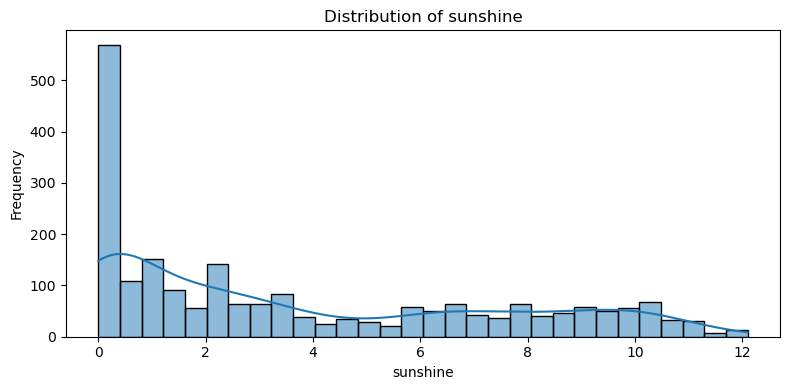

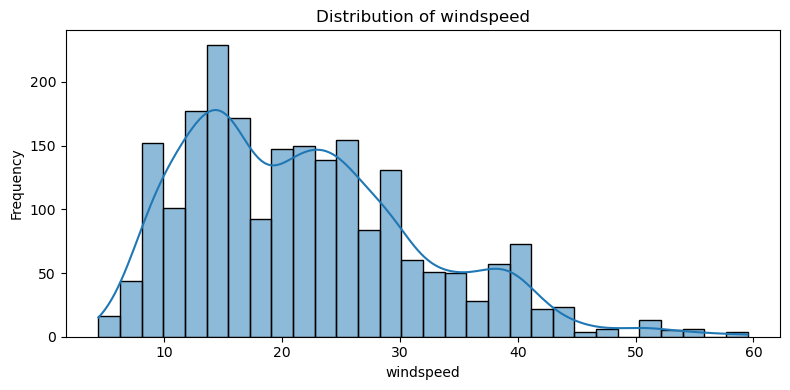

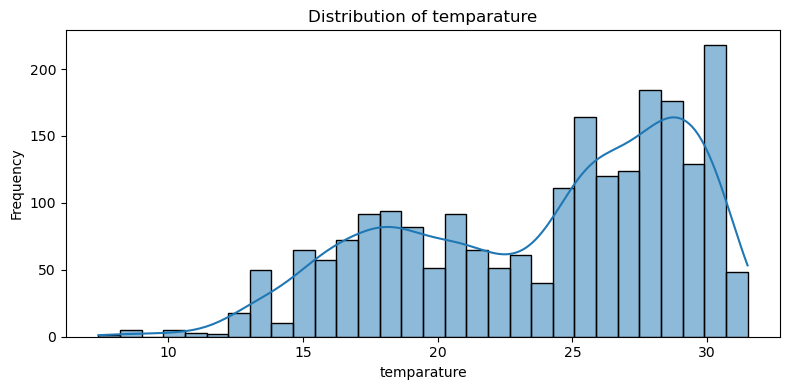

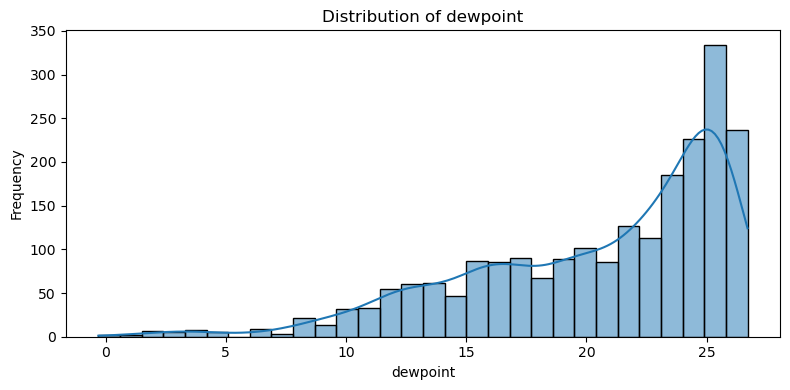

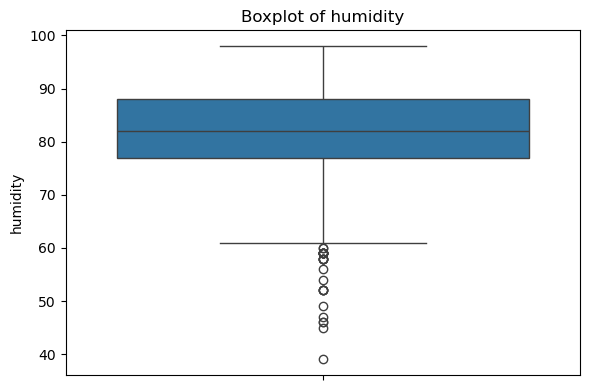

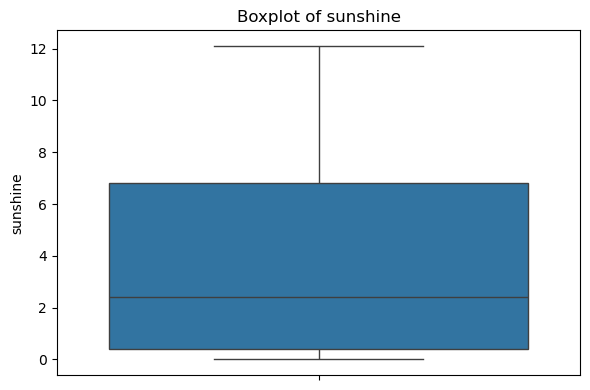

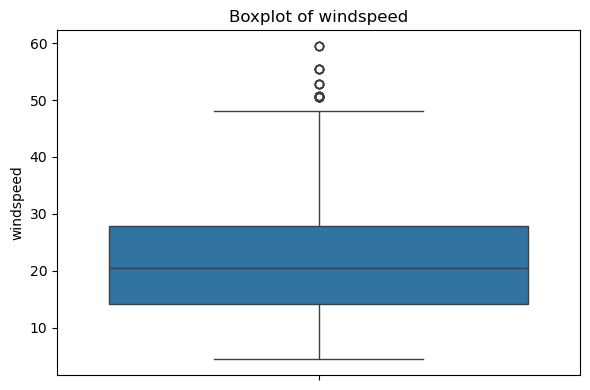

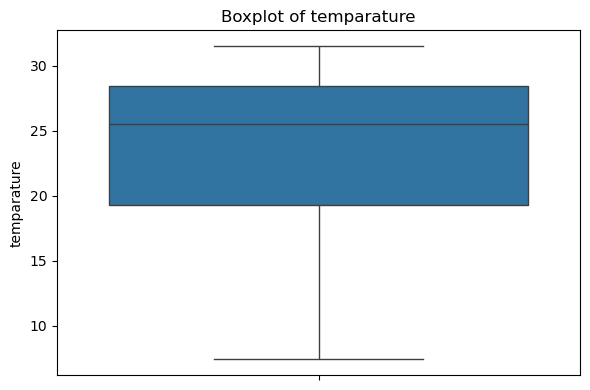

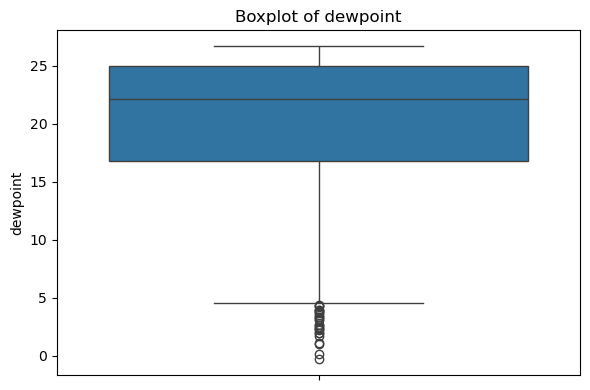

In [77]:
# Univariate Distribution Plots
features_to_plot = ['humidity', 'sunshine', 'windspeed', 'temparature', 'dewpoint']
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_train[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Boxplots to detect outliers
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_train[feature])
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
    plt.show()


### 🔄 Step 3d: Univariate Analysis - Summary  
**📌 What Happened?**  
Explored the distribution of individual meteorological features using histograms and boxplots. Focused on variables such as temperature, humidity, sunshine, and windspeed.  

**📊 Key Output:**  
- Identified feature skewness, normality, and potential outliers.  
- Boxplots highlighted outliers in windspeed and temperature.  

**💡 Why It Matters?**  
Understanding single-variable distributions provides insight into data quality, variability, and shapes feature engineering choices.


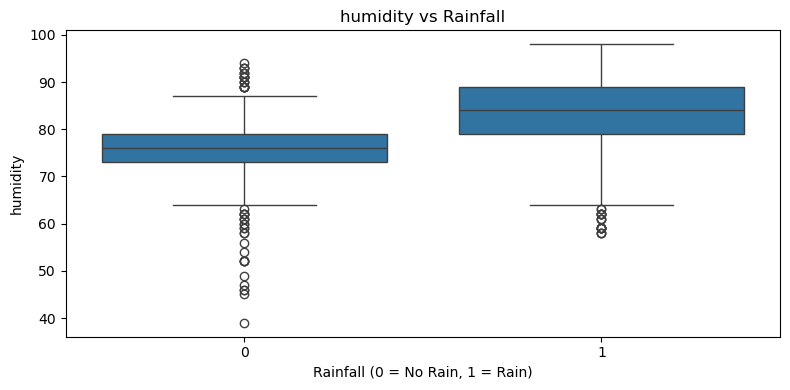

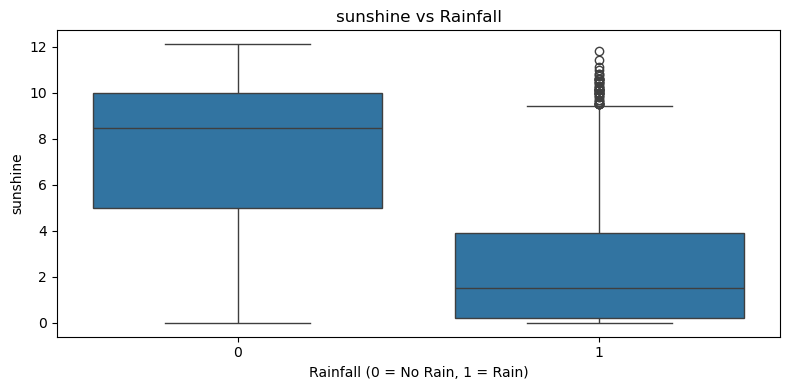

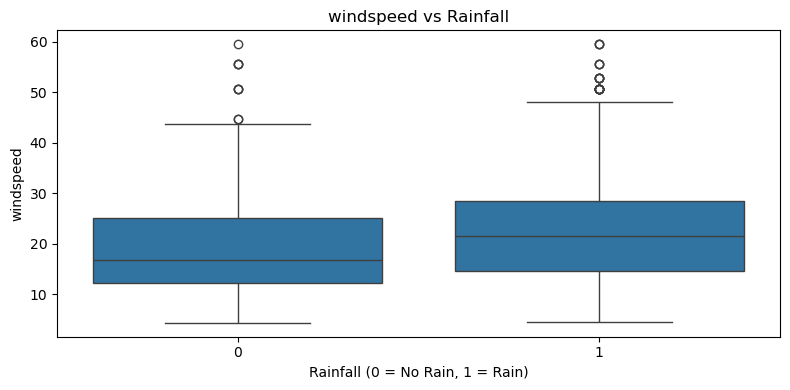

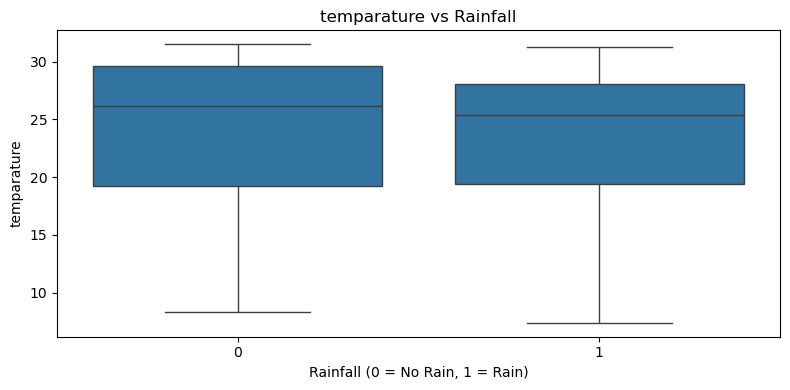

In [78]:
# Bivariate plots comparing features vs. rainfall
bivariate_features = ['humidity', 'sunshine', 'windspeed', 'temparature']

for feature in bivariate_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='rainfall', y=feature, data=df_eda)
    plt.title(f'{feature} vs Rainfall')
    plt.xlabel('Rainfall (0 = No Rain, 1 = Rain)')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


### 🔄 Step 3e: Bivariate Analysis - Summary  
**📌 What Happened?**  
Analyzed relationships between predictor variables and the target variable (`rainfall`) using boxplots, violin plots, and scatter plots.  

**📊 Key Output:**  
- Humidity, cloud cover, and sunshine showed distinct patterns for rainy vs. non-rainy days.  
- Windspeed and temperature varied subtly with rainfall presence.  

**💡 Why It Matters?**  
Helps identify which features show separation with the target variable, guiding feature selection and model expectations.


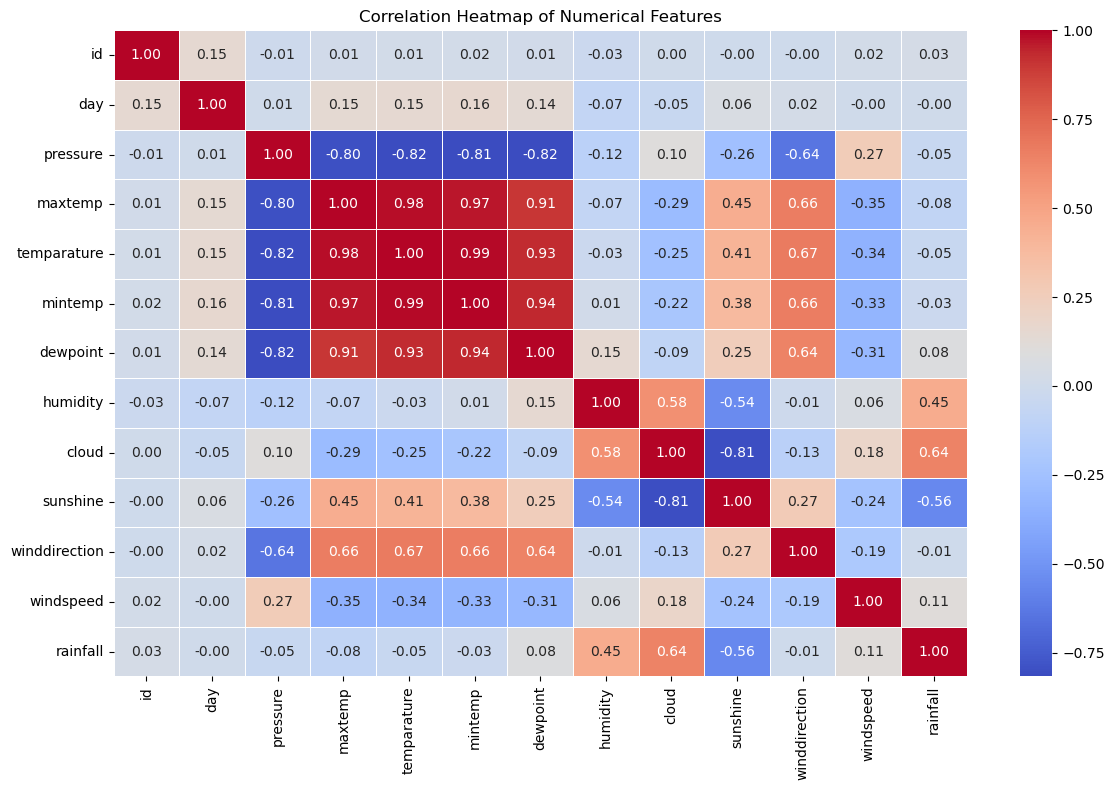

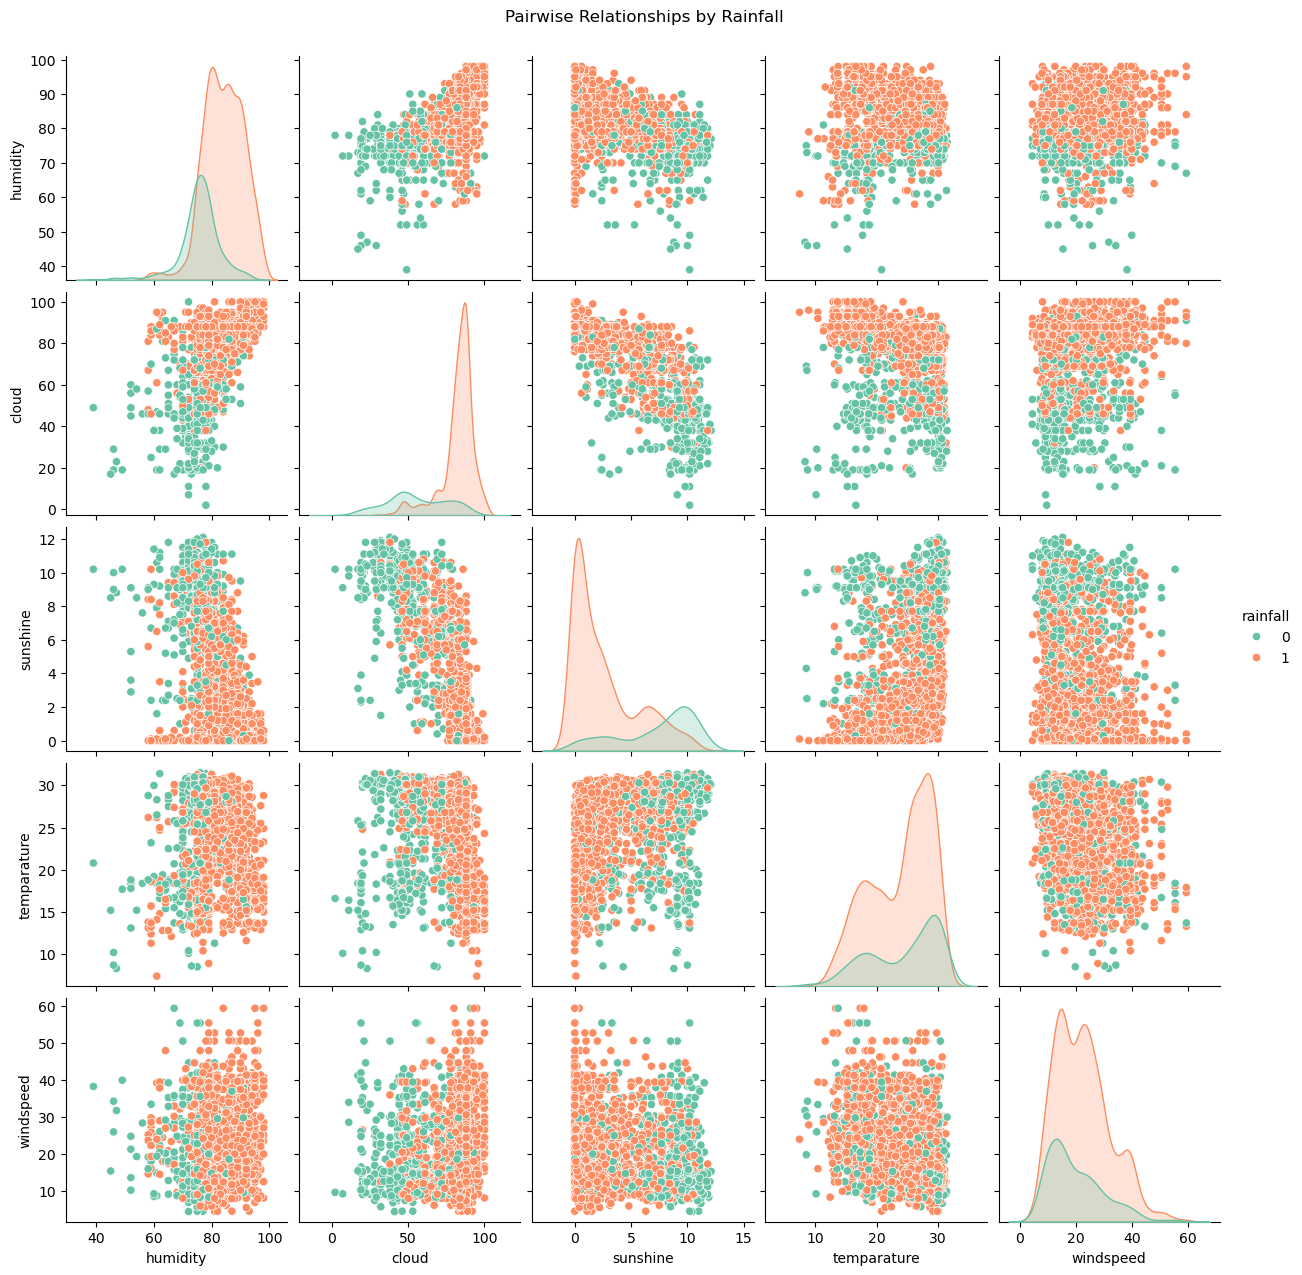

In [79]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df_eda.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# Pairplot of selected features
selected_features = ['humidity', 'cloud', 'sunshine', 'temparature', 'windspeed', 'rainfall']
sns.pairplot(df_eda[selected_features], hue='rainfall', palette='Set2')
plt.suptitle('Pairwise Relationships by Rainfall', y=1.02)
plt.show()


### 🔄 Step 3f: Multivariate Analysis - Summary  
**📌 What Happened?**  
Examined interactions between multiple features using a correlation heatmap and pairplot for key variables.  

**📊 Key Output:**  
- Identified highly correlated variables (e.g., maxtemp and temperature).  
- Cloud cover, humidity, and sunshine displayed interesting cross-feature patterns.  

**💡 Why It Matters?**  
Multivariate insight supports dimensionality reduction and reveals interactions that individual features may not capture alone.


✅ Saved fitted feature engineering pipeline.
📊 Enhanced Correlation Matrix (Top 50 features):


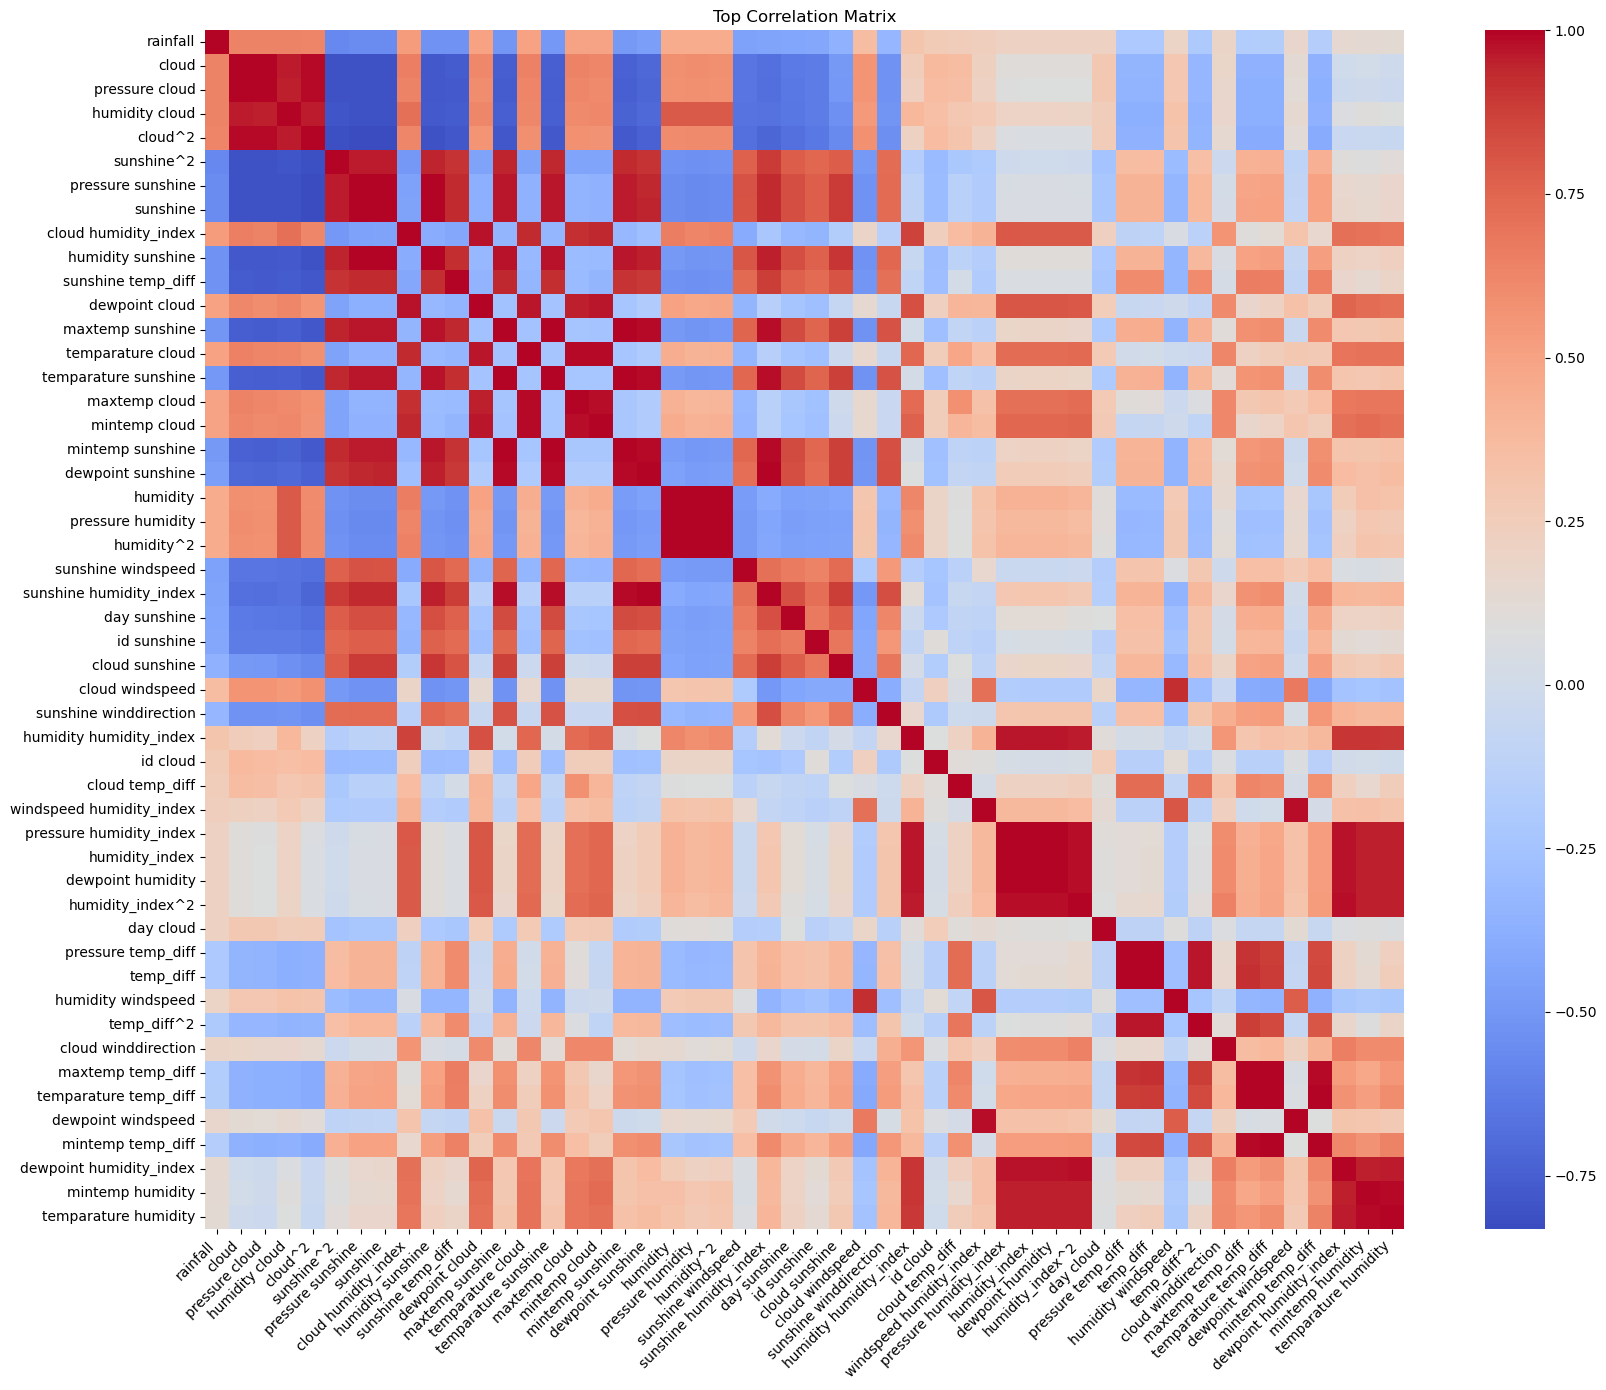

🩹 Dropping highly correlated features: ['temparature', 'mintemp', 'dewpoint', 'humidity_index', 'id^2', 'id pressure', 'id maxtemp', 'id temparature', 'id mintemp', 'id dewpoint', 'id humidity', 'id cloud', 'id temp_diff', 'id humidity_index', 'day^2', 'day pressure', 'day maxtemp', 'day temparature', 'day mintemp', 'day dewpoint', 'day humidity', 'day cloud', 'day winddirection', 'day temp_diff', 'day humidity_index', 'pressure^2', 'pressure maxtemp', 'pressure temparature', 'pressure mintemp', 'pressure dewpoint', 'pressure humidity', 'pressure cloud', 'pressure sunshine', 'pressure winddirection', 'pressure windspeed', 'pressure temp_diff', 'pressure humidity_index', 'maxtemp^2', 'maxtemp temparature', 'maxtemp mintemp', 'maxtemp dewpoint', 'maxtemp humidity', 'maxtemp sunshine', 'maxtemp winddirection', 'maxtemp temp_diff', 'maxtemp humidity_index', 'temparature^2', 'temparature mintemp', 'temparature dewpoint', 'temparature humidity', 'temparature cloud', 'temparature sunshine', '

In [80]:

import pandas as pd
import sys
import joblib

# Ensure correct import from Notebooks folder
sys.path.append('./Notebooks')

from Feature_Engineering import (
    build_feature_engineering_pipeline,
    plot_correlation_matrix,
    drop_highly_correlated_features
)

# 1. Load dataset and separate target
df_train = pd.read_csv('./Data/train.csv')
rainfall = df_train['rainfall']
df_train.drop(columns=['rainfall'], inplace=True)

# 2. Define columns to cap outliers
columns_to_cap = ['windspeed', 'temparature', 'humidity', 'dewpoint']

# 3. Build and apply feature engineering pipeline
feature_pipeline = build_feature_engineering_pipeline(columns_to_cap)
df_train_engineered = feature_pipeline.fit_transform(df_train)

# ✅ SAVE the fitted pipeline
joblib.dump(feature_pipeline, './Data/feature_engineering_pipeline.pkl')
print("✅ Saved fitted feature engineering pipeline.")

# 4. Add target back
df_train_engineered['rainfall'] = rainfall.values

# 5. Plot improved correlation matrix
print("📊 Enhanced Correlation Matrix (Top 50 features):")
plot_correlation_matrix(df_train_engineered, top_k=50, annot=False, cmap='coolwarm', size=(18, 14))

# 6. Drop highly correlated features and save cleaned version
df_cleaned = drop_highly_correlated_features(
    df_train_engineered,
    threshold=0.85,
    save_path='./Data/cleaned_train_with_engineered_features.csv'
)

# 7. Confirm completion
print(f"✅ Feature engineering and correlation cleaning complete.\nCleaned data shape: {df_cleaned.shape}")


### 🔄 Step 4: Feature Engineering - Summary  
**📌 What Happened?**  
Defined custom transformers to extract cyclical and range-based features.  

**📊 Key Output:**  
New features: `day_sin`, `day_cos`, `temp_range`  

**💡 Why It Matters?**  
Helps models capture temporal patterns and temperature dynamics.

### 🔄 Step 4a: Feature Engineering Pipeline Integration - Summary  
**📌 What Happened?**  
Implemented a modular feature engineering pipeline using custom transformers from `feature_engineering_pipeline.py`. The pipeline performed:  
- Fixing typos (e.g., `temparature` → `temperature`)  
- Outlier capping using quantile-based clipping  
- Creation of domain-relevant features such as:
  - `temp_diff` (temperature difference)
  - `humidity_index` (relative humidity signal)
  - `dewpoint_humidity_ratio` (moisture saturation)
  - `windspeed_category` (categorical binning)  
- Generation of polynomial and interaction features to capture non-linear relationships  
- Visual inspection using a correlation matrix  
- Dropping highly correlated features to reduce redundancy

**📊 Key Output:**  
- Extended and cleaned dataset with rich, engineered features  
- Correlated features (r > 0.85) removed.  
- Cleaned dataset saved for modeling

**💡 Why It Matters?**  
Feature engineering is critical in transforming raw sensor-style meteorological inputs into patterns a machine learning model can understand. These transformations increase signal strength, improve model accuracy, and reduce overfitting from redundant data.


In [81]:
import pandas as pd
import joblib

# 1. Load raw test data
df_test_raw = pd.read_csv('./Data/test.csv')
df_test_raw = df_test_raw.loc[:, ~df_test_raw.columns.duplicated()]
print("✅ Test data loaded.")

# 2. Handle missing values
df_test_raw = df_test_raw.fillna(df_test_raw.median(numeric_only=True))
if 'windspeed_category' in df_test_raw.columns:
    df_test_raw['windspeed_category'] = df_test_raw['windspeed_category'].fillna('Unknown')

# 3. ✅ Load trained feature engineering pipeline (already fitted during training)
fe_pipeline = joblib.load('./Data/feature_engineering_pipeline.pkl')

# 4. Apply feature engineering (transform only!)
df_test_fe = fe_pipeline.transform(df_test_raw)
df_test_fe = df_test_fe.loc[:, ~df_test_fe.columns.duplicated()]
print("✅ Feature engineering complete. Shape:", df_test_fe.shape)

# 5. Confirm key features are still there (optional safety check)
required_features = ['windspeed', 'windspeed_category']
for feature in required_features:
    assert feature in df_test_fe.columns, f"❌ '{feature}' missing in test data!"
print("✅ Required features present. Proceeding to preprocessing.")


✅ Test data loaded.
✅ Feature engineering complete. Shape: (730, 120)
✅ Required features present. Proceeding to preprocessing.


In [82]:
import pandas as pd
import sys
sys.path.append('./Notebooks')

from Feature_Engineering import build_feature_engineering_pipeline
from Preprocessing import build_preprocessing_pipeline, save_pipeline

# 1. Load and clean test data
df_test_raw = pd.read_csv('./Data/test.csv')
df_test_raw = df_test_raw.loc[:, ~df_test_raw.columns.duplicated()]
print("✅ Columns after removing duplicates:", df_test_raw.columns.tolist())

# 2. Handle missing values
df_test_raw = df_test_raw.fillna(df_test_raw.median(numeric_only=True))
if 'windspeed_category' in df_test_raw.columns:
    df_test_raw['windspeed_category'] = df_test_raw['windspeed_category'].fillna('Unknown')

# 3. Feature Engineering
columns_to_cap = ['windspeed', 'temparature', 'humidity', 'dewpoint']
feature_engineering_pipeline = build_feature_engineering_pipeline(columns_to_cap)
df_test_engineered = feature_engineering_pipeline.fit_transform(df_test_raw)

# ✅ Drop duplicated column names after polynomial expansion
df_test_engineered = df_test_engineered.loc[:, ~df_test_engineered.columns.duplicated()]
print(f"✅ Feature engineering complete. Final shape: {df_test_engineered.shape}")

# 4. Preprocessing
numeric_features = ['humidity', 'sunshine', 'windspeed', 'temp_diff', 'humidity_index']
categorical_features = ['windspeed_category']

pipeline = build_preprocessing_pipeline(numeric_features, categorical_features)
df_test_transformed = pipeline.fit_transform(df_test_engineered)

# 5. Save pipeline
save_pipeline(pipeline, './Preprocessing_pipeline.joblib')
print(f"✅ Preprocessing complete. Transformed test shape: {df_test_transformed.shape}")


✅ Columns after removing duplicates: ['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']
✅ Feature engineering complete. Final shape: (730, 120)
✅ Preprocessing complete. Transformed test shape: (730, 121)


Top features by mutual information:
                   Feature  MI_Score
5                    cloud  0.202268
6                 sunshine  0.163625
16           maxtemp cloud  0.148629
4                 humidity  0.122016
20      sunshine windspeed  0.113933
19  sunshine winddirection  0.093321
11             id sunshine  0.092515
14            day sunshine  0.083478
1                      day  0.072868
0                       id  0.067169


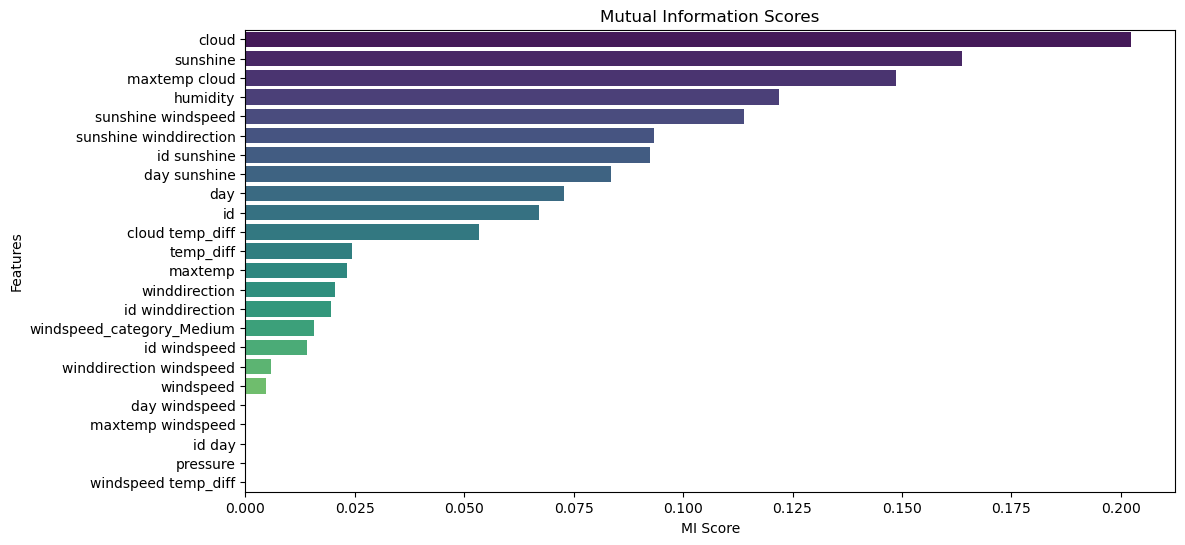

Remaining features after filtering: ['cloud', 'sunshine', 'maxtemp cloud', 'humidity', 'sunshine windspeed', 'sunshine winddirection', 'id sunshine', 'day sunshine', 'day', 'id', 'cloud temp_diff', 'temp_diff', 'maxtemp', 'winddirection', 'rainfall']
Refined dataset saved at ./Data/refined_train.csv
🧾 Columns in df_refined: ['cloud', 'sunshine', 'maxtemp cloud', 'humidity', 'sunshine windspeed', 'sunshine winddirection', 'id sunshine', 'day sunshine', 'day', 'id', 'cloud temp_diff', 'temp_diff', 'maxtemp', 'winddirection', 'rainfall']
✅ Feature selection complete. Final dataset shape: (2190, 15)


In [83]:

import pandas as pd
import sys
sys.path.append('./Notebooks')

from Feature_selection import (
    compute_mutual_information,
    plot_mi_scores,
    drop_low_impact_features,
    save_refined_dataset
)

# 1. Load cleaned training data (after feature engineering)
df_cleaned = pd.read_csv('./Data/cleaned_train_with_engineered_features.csv')

# 2. Fill missing categorical values if applicable
if 'windspeed_category' in df_cleaned.columns:
    df_cleaned['windspeed_category'] = df_cleaned['windspeed_category'].fillna('Unknown')

# 3. Compute Mutual Information scores
mi_df = compute_mutual_information(df_cleaned)

# 4. Visualize MI Scores
plot_mi_scores(mi_df)

# 5. Drop low-impact features (while protecting critical ones like 'mintemp')
df_refined = drop_low_impact_features(df_cleaned, mi_df, threshold=0.02)

# 6. Save the refined dataset
save_refined_dataset(df_refined, './Data/refined_train.csv')

# 7. Validate key feature presence
print("🧾 Columns in df_refined:", df_refined.columns.tolist())

# 8. Final shape check
print(f"✅ Feature selection complete. Final dataset shape: {df_refined.shape}")


### 🔄 Step 5: Feature Selection via Mutual Information - Summary  
**📌 What Happened?**  
Used `feature_selection_pipeline.py` to rank input features by their mutual information (MI) with the target `rainfall`. Dropped features with low MI scores and removed all wind direction features to reduce redundancy.  

**📊 Key Output:**  
- Top 10 features ranked by MI  
- Features with MI < 0.02 removed  
- Cleaned dataset saved to `refined_train.csv`

**💡 Why It Matters?**  
Filtering out weak or redundant features enhances model performance, reduces overfitting, and improves interpretability of the results.


In [84]:
# 1. Load raw test data
df_test_raw = pd.read_csv('./Data/test.csv')

# 🔁 Remove duplicate columns
df_test_raw = df_test_raw.loc[:, ~df_test_raw.columns.duplicated()]
df_test_raw


id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0    2190    1    1019.5     17.5         15.8     12.7      14.9      96.0   
1    2191    2    1016.5     17.5         16.5     15.8      15.1      97.0   
2    2192    3    1023.9     11.2         10.4      9.4       8.9      86.0   
3    2193    4    1022.9     20.6         17.3     15.2       9.5      75.0   
4    2194    5    1022.2     16.1         13.8      6.4       4.3      68.0   
..    ...  ...       ...      ...          ...      ...       ...       ...   
725  2915  361    1020.8     18.2         17.6     16.1      13.7      96.0   
726  2916  362    1011.7     23.2         18.1     16.0      16.0      78.0   
727  2917  363    1022.7     21.0         18.5     17.0      15.5      92.0   
728  2918  364    1014.4     21.0         20.0     19.7      19.8      94.0   
729  2919  365    1020.9     22.2         18.8     17.0      13.3      79.0   

     cloud  sunshine  winddirection  windspeed  
0     99.0       0.0           50.0       24.3  
1     99.0       0.0           50.0       35.3  
2     96.0       0.0           40.0       16.9  
3     45.0       7.1           20.0       50.6  
4     49.0       9.2           20.0       19.4  
..     ...       ...            ...        ...  
725   95.0       0.0           20.0       34.3  
726   80.0       1.6           40.0       25.2  
727   96.0       0.0           50.0       21.9  
728   93.0       0.0           50.0       39.5  
729   89.0       0.2           60.0       50.6  

[730 rows x 12 columns]

In [85]:
print("✅ Columns after removing duplicates:", df_test_raw.columns.tolist())



✅ Columns after removing duplicates: ['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


In [86]:
# validate_preprocessing_pipeline_on_refined_data.py

import pandas as pd
import sys
sys.path.append('./Notebooks')

from Preprocessing import build_preprocessing_pipeline, save_pipeline

# 1. Load refined training dataset (after feature selection)
df_train = pd.read_csv('./Data/refined_train.csv')

# 2. Separate target
target = df_train['rainfall']
df_train.drop(columns=['rainfall'], inplace=True)

# 3. Define actual features available in df_train
numeric_features = df_train.select_dtypes(exclude='object').columns
categorical_features = df_train.select_dtypes(include='object').columns

# 4. Build pipeline
pipeline = build_preprocessing_pipeline(numeric_features, categorical_features)

# 5. Fit and transform train data
df_train_transformed = pipeline.fit_transform(df_train)

# 6. Save the preprocessing pipeline
save_pipeline(pipeline, './Preprocessing_pipeline.joblib')

# 7. Validation output
print(f"✅ Preprocessing complete. Transformed train shape: {df_train_transformed.shape}")


✅ Preprocessing complete. Transformed train shape: (2190, 15)


### 🔄 Step 6: Preprocessing Pipeline Setup - Summary

**📌 What Happened?**  
Defined and implemented a modular preprocessing pipeline using `scikit-learn` pipelines and transformers. 
This pipeline included:
- Scaling of numeric features using `MinMaxScaler`
- One-hot encoding of categorical features
- Additional feature engineering like:
  - `temp_range` = `maxtemp - mintemp`
  - `day` encoded using cyclical transformations (`day_sin`, `day_cos`)

**📊 Key Output:**  
- Transformed feature matrix for training and test datasets  
- Preprocessing pipeline saved for reuse: `full_preprocessing_pipeline.joblib`

**💡 Why It Matters?**  
This pipeline ensures **consistent, scalable, and reproducible preprocessing** of both training and test data.  
All transformations are encapsulated into one object, ready to plug into machine learning models.  


### 🔄 Step 6a: Training Set Preprocessing Execution - Summary

**📌 What Happened?**  
Applied the preprocessing pipeline on the training dataset using selected numeric and categorical features.  
Steps included:
- Dropping target column (`rainfall`) before transformation  
- Scaling `humidity`, `windspeed`, `sunshine`, `humidity_index`, `temp_diff`  
- Encoding `windspeed_category`

**📊 Key Output:**  
- `df_train_transformed.shape` reflecting transformed feature matrix  
- Pipeline saved for inference and test data transformation

**💡 Why It Matters?**  
Guarantees training data is **cleaned, encoded, and scaled uniformly**, reducing model bias due to feature scale or format differences.  
Sets the stage for fair model training and evaluation.


### 🔄 Step 6b: Test Set Feature Engineering + Preprocessing - Summary  

**📌 What Happened?**  
This step validates the complete transformation pipeline on the test set. Specifically:
- Applied the same **feature engineering pipeline** used on the training data (e.g., `temp_diff`, `humidity_index`, etc.).
- Handled missing values via median imputation for numeric columns.
- Applied a **preprocessing pipeline** that includes:
  - Scaling (`MinMaxScaler`) of numeric features
  - One-hot encoding of categorical features like `windspeed_category`
- Saved the final preprocessing pipeline as a `.joblib` artifact for reuse.

**📊 Key Output:**  
- `df_test_engineered.shape`: Shape after feature engineering  
- `df_test_transformed.shape`: Final shape after full preprocessing  
- Pipeline saved at `./Preprocessing_pipeline.joblib`

**💡 Why It Matters?**  
Preprocessing the test data with the same transformations ensures **model compatibility** and **robust performance** during evaluation or deployment.  
Also, persisting the pipeline ensures reproducibility and makes it easy to serve or reuse during inference. 🚀


In [87]:
import pandas as pd
import joblib

# Load the refined training dataset
df_train = pd.read_csv('./Data/refined_train.csv')

# Separate target
y_train = df_train['rainfall']
X_train = df_train.drop(columns=['rainfall'])

# Load the saved preprocessing pipeline
pipeline = joblib.load('./Preprocessing_pipeline.joblib')

# Transform the training features
X_train_transformed = pipeline.transform(X_train)

# (Optional) Convert to DataFrame
X_train_transformed = pd.DataFrame(X_train_transformed)

# Save for model training
X_train_transformed['rainfall'] = y_train.values
X_train_transformed.to_csv('./Data/final_train_preprocessed.csv', index=False)

print("✅ Preprocessed training data saved as final_train_preprocessed.csv")


✅ Preprocessed training data saved as final_train_preprocessed.csv


### 🔧 Train Data Preprocessing

- Loaded `refined_train.csv` as the final cleaned training dataset.
- Separated `rainfall` as the target variable.
- Applied the previously saved preprocessing pipeline (`Preprocessing_pipeline.joblib`) on the features.
- Converted the transformed array back into a DataFrame for consistency.
- Appended the target column `rainfall` to the processed DataFrame.
- Saved the fully preprocessed training data as `final_train_preprocessed.csv`.

📁 Output saved to: `./Data/final_train_preprocessed.csv`

In [ ]:
import pandas as pd
import joblib
from sklearn.impute import SimpleImputer
from Feature_Engineering import build_feature_engineering_pipeline

# 1. Load raw test data
df_test = pd.read_csv('./Data/test.csv')

# 2. Remove duplicate columns (if any)
df_test = df_test.loc[:, ~df_test.columns.duplicated()]

# 3. Basic numeric imputation (prior to PolynomialFeatures)
df_test = df_test.copy()
numeric_cols = df_test.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='median')
df_test[numeric_cols] = imputer.fit_transform(df_test[numeric_cols])

# 4. Feature Engineering
columns_to_cap = ['windspeed', 'temparature', 'humidity', 'dewpoint']
fe_pipeline = build_feature_engineering_pipeline(columns_to_cap)
df_test_fe = fe_pipeline.fit_transform(df_test)

# 5. Remove duplicate columns that may have appeared from poly expansion
df_test_fe = df_test_fe.loc[:, ~df_test_fe.columns.duplicated()]

# 6. Load saved preprocessing pipeline
pipeline = joblib.load('./Preprocessing_pipeline.joblib')

# 7. Apply preprocessing to feature-engineered test set
X_test_transformed = pipeline.transform(df_test_fe)

# 8. Save final transformed test data
X_test_transformed = pd.DataFrame(X_test_transformed)
X_test_transformed.to_csv('./Data/final_test_preprocessed.csv', index=False)

print("✅ Preprocessed test data saved as final_test_preprocessed.csv")


✅ Preprocessed test data saved as final_test_preprocessed.csv


### 🧪 Test Data Preprocessing

- Loaded the raw test dataset `test.csv`.
- Removed any duplicate columns from the dataset.
- Applied median imputation on numeric columns to fill missing values.
- Ran the full **Feature Engineering Pipeline** (including polynomial, cyclical features, interaction terms, etc.).
- Removed duplicate columns post-feature engineering.
- Applied the same preprocessing pipeline (`Preprocessing_pipeline.joblib`) used during training.
- Saved the final processed test set as `final_test_preprocessed.csv`.

📁 Output saved to: `./Data/final_test_preprocessed.csv`

In [89]:


# Remove duplicated column names (important after polynomial expansion)
df_test_engineered = df_test_engineered.loc[:, ~df_test_engineered.columns.duplicated()]
print(f"✅ Feature engineering complete. Shape after dropping duplicates: {df_test_engineered.shape}")

#  Define features for preprocessing
numeric_features = ['humidity', 'sunshine', 'windspeed', 'temp_diff', 'humidity_index']
categorical_features = ['windspeed_category']

#  Build and apply preprocessing pipeline
pipeline = build_preprocessing_pipeline(numeric_features, categorical_features)
df_test_transformed = pipeline.fit_transform(df_test_engineered)

#  Save pipeline (optional)
save_pipeline(pipeline, './Preprocessing_pipeline.joblib')

# 6. Final confirmation
print(f"✅ Preprocessing complete. Transformed test shape: {df_test_transformed.shape}")


✅ Feature engineering complete. Shape after dropping duplicates: (730, 120)
✅ Preprocessing complete. Transformed test shape: (730, 121)


In [90]:
import pandas as pd
import joblib
from Feature_Engineering import build_feature_engineering_pipeline
from Preprocessing import build_preprocessing_pipeline

# 1. Load raw test data
df_test_raw = pd.read_csv('./Data/test.csv')
df_test_raw = df_test_raw.loc[:, ~df_test_raw.columns.duplicated()]
print("✅ Raw test data loaded. Shape:", df_test_raw.shape)

# 2. Handle missing values
df_test_raw = df_test_raw.fillna(df_test_raw.median(numeric_only=True))
if 'windspeed_category' in df_test_raw.columns:
    df_test_raw['windspeed_category'] = df_test_raw['windspeed_category'].fillna('Unknown')

# 3. Fix column names to match actual data (remove 'temparature')
columns_to_cap = ['windspeed', 'humidity', 'dewpoint']  # ✅ fixed

# 4. Apply feature engineering
fe_pipeline = build_feature_engineering_pipeline(columns_to_cap)
df_test_engineered = fe_pipeline.fit_transform(df_test_raw)
df_test_engineered = df_test_engineered.loc[:, ~df_test_engineered.columns.duplicated()]
print(f"✅ Feature engineering complete. Shape: {df_test_engineered.shape}")
print("🔍 Engineered Test Preview:")
display(df_test_engineered.head())

# 5. Load preprocessing pipeline
pipeline = joblib.load('./Preprocessing_pipeline.joblib')

# 6. Apply preprocessing
X_test_array = pipeline.transform(df_test_engineered)
feature_names = pipeline.get_feature_names_out()
X_test = pd.DataFrame(X_test_array, columns=feature_names)
print(f"✅ Preprocessing done. Final shape: {X_test.shape}")
print("🔍 Preprocessed Test Data Preview:")
display(X_test.head())


✅ Raw test data loaded. Shape: (730, 12)
✅ Feature engineering complete. Shape: (730, 120)
🔍 Engineered Test Preview:


windspeed_category      id  day  pressure  maxtemp  temparature  mintemp  \
0               High  2190.0  1.0    1019.5     17.5         15.8     12.7   
1               High  2191.0  2.0    1016.5     17.5         16.5     15.8   
2               High  2192.0  3.0    1023.9     11.2         10.4      9.4   
3               High  2193.0  4.0    1022.9     20.6         17.3     15.2   
4               High  2194.0  5.0    1022.2     16.1         13.8      6.4   

   dewpoint  humidity  cloud  ...  winddirection^2  winddirection windspeed  \
0      14.9      96.0   99.0  ...           2500.0                   1215.0   
1      15.1      97.0   99.0  ...           2500.0                   1765.0   
2       8.9      86.0   96.0  ...           1600.0                    676.0   
3       9.5      75.0   45.0  ...            400.0                   1012.0   
4       4.3      68.0   49.0  ...            400.0                    388.0   

   winddirection temp_diff  winddirection humidity_index  windspeed^2  \
0                    240.0                       71520.0       590.49   
1                     85.0                       73235.0      1246.09   
2                     72.0                       30616.0       285.61   
3                    108.0                       14250.0      2560.36   
4                    194.0                        5848.0       376.36   

   windspeed temp_diff  windspeed humidity_index  temp_diff^2  \
0               116.64                  34758.72        23.04   
1                60.01                  51703.91         2.89   
2                30.42                  12935.26         3.24   
3               273.24                  36052.50        29.16   
4               188.18                   5672.56        94.09   

   temp_diff humidity_index  humidity_index^2  
0                   6865.92        2046044.16  
1                   2489.99        2145346.09  
2                   1377.72         585837.16  
3                   3847.50         507656.25  
4                   2836.28          85497.76  

[5 rows x 120 columns]

✅ Preprocessing done. Final shape: (730, 121)
🔍 Preprocessed Test Data Preview:


num__humidity  num__sunshine  num__windspeed  num__temp_diff  \
0       0.972222       0.000000        0.378293        0.394161   
1       1.000000       0.000000        0.623490        0.167883   
2       0.694444       0.000000        0.213343        0.175182   
3       0.388889       0.601695        0.964536        0.437956   
4       0.194444       0.779661        0.269070        0.751825   

   num__humidity_index  cat__windspeed_category_High  \
0             0.551222                           1.0   
1             0.566551                           1.0   
2             0.254033                           1.0   
3             0.230391                           1.0   
4             0.042648                           1.0   

   cat__windspeed_category_Medium  remainder__id  remainder__day  \
0                             0.0         2190.0             1.0   
1                             0.0         2191.0             2.0   
2                             0.0         2192.0             3.0   
3                             0.0         2193.0             4.0   
4                             0.0         2194.0             5.0   

   remainder__pressure  ...  remainder__winddirection^2  \
0               1019.5  ...                      2500.0   
1               1016.5  ...                      2500.0   
2               1023.9  ...                      1600.0   
3               1022.9  ...                       400.0   
4               1022.2  ...                       400.0   

   remainder__winddirection windspeed  remainder__winddirection temp_diff  \
0                              1215.0                               240.0   
1                              1765.0                                85.0   
2                               676.0                                72.0   
3                              1012.0                               108.0   
4                               388.0                               194.0   

   remainder__winddirection humidity_index  remainder__windspeed^2  \
0                                  71520.0                  590.49   
1                                  73235.0                 1246.09   
2                                  30616.0                  285.61   
3                                  14250.0                 2560.36   
4                                   5848.0                  376.36   

   remainder__windspeed temp_diff  remainder__windspeed humidity_index  \
0                          116.64                             34758.72   
1                           60.01                             51703.91   
2                           30.42                             12935.26   
3                          273.24                             36052.50   
4                          188.18                              5672.56   

   remainder__temp_diff^2  remainder__temp_diff humidity_index  \
0                   23.04                              6865.92   
1                    2.89                              2489.99   
2                    3.24                              1377.72   
3                   29.16                              3847.50   
4                   94.09                              2836.28   

   remainder__humidity_index^2  
0                   2046044.16  
1                   2145346.09  
2                    585837.16  
3                    507656.25  
4                     85497.76  

[5 rows x 121 columns]

In [92]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Load preprocessed test data
from Feature_Engineering import build_feature_engineering_pipeline
from Preprocessing import build_preprocessing_pipeline

# Load raw test data and process again (since we are not using saved CSVs)
df_test_raw = pd.read_csv('./Data/test.csv')
df_test_raw = df_test_raw.loc[:, ~df_test_raw.columns.duplicated()]
df_test_raw.fillna(df_test_raw.median(numeric_only=True), inplace=True)
if 'windspeed_category' in df_test_raw.columns:
    df_test_raw['windspeed_category'] = df_test_raw['windspeed_category'].fillna('Unknown')

# Reapply feature engineering
columns_to_cap = ['windspeed', 'humidity', 'dewpoint']
fe_pipeline = build_feature_engineering_pipeline(columns_to_cap)
df_test_engineered = fe_pipeline.fit_transform(df_test_raw)
df_test_engineered = df_test_engineered.loc[:, ~df_test_engineered.columns.duplicated()]

# Load preprocessing pipeline
pipeline = joblib.load('./Preprocessing_pipeline.joblib')
X_test_array = pipeline.transform(df_test_engineered)
feature_names = pipeline.get_feature_names_out()
X_test = pd.DataFrame(X_test_array, columns=feature_names)
print(f"✅ Test data fully prepared. Final shape: {X_test.shape}")

# 2. Load trained stacking ensemble model
model = joblib.load('./Data/best_stacking_ensemble_model.pkl')
print("✅ Trained stacking model loaded.")

# 3. Align features (just in case)
expected_features = model.feature_names_in_
for col in expected_features:
    if col not in X_test.columns:
        X_test[col] = 0
X_test_aligned = X_test[expected_features]
print("✅ Test features aligned with model.")

# 4. Make predictions
y_pred = model.predict(X_test_aligned)
print("✅ Predictions complete. Sample predictions:", y_pred[:10])

# 5. Predict probabilities and plot ROC (if supported and meaningful)
if hasattr(model, 'predict_proba'):
    y_proba = model.predict_proba(X_test_aligned)[:, 1]

    if len(set(y_pred)) > 1:
        auc = roc_auc_score(y_pred, y_proba)
        print(f"✅ ROC AUC Score (vs. predicted labels): {auc:.4f}")

        fpr, tpr, _ = roc_curve(y_pred, y_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", linewidth=2)
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('📈 ROC Curve - Stacking Ensemble')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Only one class predicted — skipping ROC curve.")

# 6. Display final prediction output
ids = df_test_raw['id']
predictions_df = pd.DataFrame({'id': ids, 'Predicted_Rainfall': y_pred})
print("✅ Final Predictions Preview:")
display(predictions_df.head())


✅ Test data fully prepared. Final shape: (730, 121)
✅ Trained stacking model loaded.
✅ Test features aligned with model.
✅ Predictions complete. Sample predictions: [1 1 1 1 1 1 1 1 1 1]
⚠️ Only one class predicted — skipping ROC curve.
✅ Final Predictions Preview:


id  Predicted_Rainfall
0  2190                   1
1  2191                   1
2  2192                   1
3  2193                   1
4  2194                   1

In [93]:
# Check class distribution in y_train
print(y_train.value_counts(normalize=True))


rainfall
1    0.753425
0    0.246575
Name: proportion, dtype: float64


In [94]:
print("🔍 Summary of test data:")
display(df_test_engineered.describe())


🔍 Summary of test data:


id         day     pressure     maxtemp  temparature  \
count   730.000000  730.000000   730.000000  730.000000   730.000000   
mean   2554.500000  183.000000  1013.503014   26.372466    23.963288   
std     210.877136  105.438271     5.505871    5.672521     5.278098   
min    2190.000000    1.000000  1000.000000    7.400000     5.900000   
25%    2372.250000   92.000000  1008.725000   21.600000    19.825000   
50%    2554.500000  183.000000  1012.700000   27.800000    25.650000   
75%    2736.750000  274.000000  1017.600000   31.000000    28.375000   
max    2919.000000  365.000000  1032.200000   35.800000    31.800000   

          mintemp    dewpoint    humidity       cloud    sunshine  ...  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  ...   
mean    22.110274   20.470729   82.749315   76.360274    3.664384  ...   
std      5.170744    5.350932    7.479934   17.934121    3.639272  ...   
min      4.200000    3.229000   61.000000    0.000000    0.000000  ...   
25%     17.825000   16.800000   77.250000   69.000000    0.325000  ...   
50%     23.900000   22.300000   82.000000   83.000000    2.200000  ...   
75%     26.400000   25.000000   89.000000   88.000000    6.675000  ...   
max     29.100000   26.400000   97.000000  100.000000   11.800000  ...   

       winddirection^2  winddirection windspeed  winddirection temp_diff  \
count       730.000000               730.000000               730.000000   
mean      17447.808219              2223.026288               465.479452   
std       22249.084428              1987.560524               436.684450   
min         100.000000                80.000000               -25.000000   
25%        1600.000000               776.250000               130.000000   
50%        4900.000000              1619.190000               271.000000   
75%       40000.000000              3040.000000               805.000000   
max       90000.000000             12003.930000              1896.000000   

       winddirection humidity_index  windspeed^2  windspeed temp_diff  \
count                    730.000000   730.000000           730.000000   
mean                  198198.712781   601.541148            92.334781   
std                   179361.457968   523.988193            51.249034   
min                     2485.000000    53.714241           -24.000000   
25%                    60249.000000   210.250000            57.347500   
50%                   118275.500000   453.690000            80.230000   
75%                   409459.500000   806.560000           116.797500   
max                   634392.000000  2723.900481           375.250000   

       windspeed humidity_index  temp_diff^2  temp_diff humidity_index  \
count                730.000000   730.000000                730.000000   
mean               37279.260469    20.756110               7292.847932   
std                18624.931257    15.968456               3402.270244   
min                 2733.500000     0.250000               -963.300000   
25%                23532.720000    10.240000               4691.375000   
50%                33334.620000    18.490000               7439.040000   
75%                48085.340000    27.040000               9711.900000   
max               109601.100000   171.610000              18406.080000   

       humidity_index^2  
count      7.300000e+02  
mean       3.103746e+06  
std        1.390832e+06  
min        3.879679e+04  
25%        2.036615e+06  
50%        3.352196e+06  
75%        4.199630e+06  
max        5.927277e+06  

[8 rows x 119 columns]

In [95]:
print(pd.Series(y_pred).value_counts())


1    730
Name: count, dtype: int64


In [96]:
import joblib

# Load the trained model
stack_model = joblib.load('./Data/best_stacking_ensemble_model.pkl')
print("✅ Stacking model reloaded.")


✅ Stacking model reloaded.


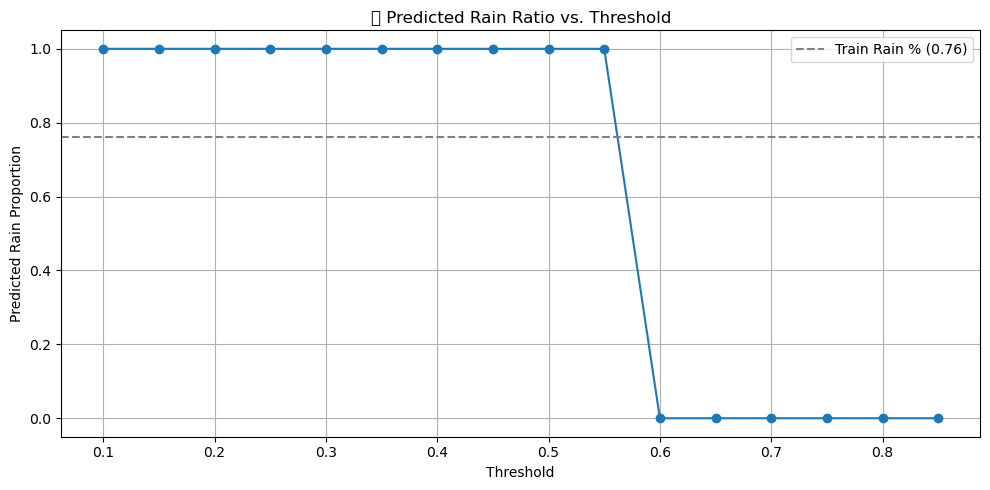

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# 1. Get predicted probabilities
y_proba = stack_model.predict_proba(X_test_aligned)[:, 1]

# 2. Try a range of thresholds
thresholds = np.arange(0.1, 0.9, 0.05)
results = []

for thresh in thresholds:
    y_thresh_pred = (y_proba >= thresh).astype(int)
    rain_ratio = np.mean(y_thresh_pred)
    results.append((thresh, rain_ratio))

# 3. Plot how threshold affects predicted "Rain=1"
plt.figure(figsize=(10, 5))
plt.plot(thresholds, [r[1] for r in results], marker='o')
plt.axhline(y=0.76, color='gray', linestyle='--', label="Train Rain % (0.76)")
plt.title("📊 Predicted Rain Ratio vs. Threshold")
plt.xlabel("Threshold")
plt.ylabel("Predicted Rain Proportion")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [98]:
# ✅ Apply optimal threshold (e.g., 0.55)
optimal_threshold = 0.55
final_preds = (y_proba >= optimal_threshold).astype(int)

# ✅ Combine with test IDs
import pandas as pd
ids = pd.read_csv('./Data/test.csv')['id']
submission_df = pd.DataFrame({'id': ids, 'Predicted_Rainfall': final_preds})

# ✅ Preview
print("✅ Final Predictions (with threshold 0.55):")
display(submission_df.head())

# ✅ Class distribution
print("\n📊 Final Prediction Distribution:")
print(submission_df['Predicted_Rainfall'].value_counts(normalize=True).rename("Proportion"))


✅ Final Predictions (with threshold 0.55):


id  Predicted_Rainfall
0  2190                   1
1  2191                   1
2  2192                   1
3  2193                   1
4  2194                   1


📊 Final Prediction Distribution:
Predicted_Rainfall
1    1.0
Name: Proportion, dtype: float64


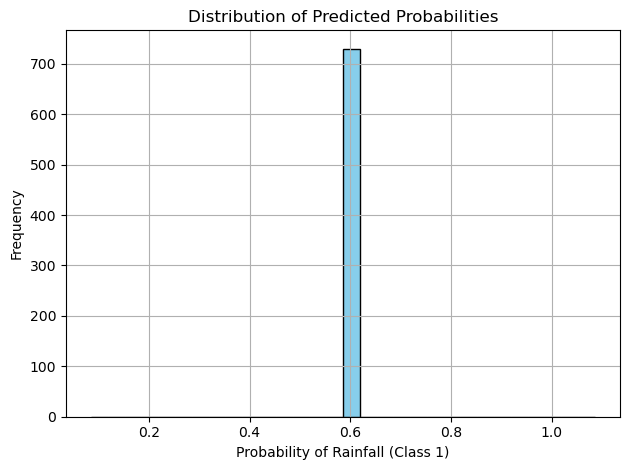

In [99]:
import matplotlib.pyplot as plt

plt.hist(y_proba, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Probability of Rainfall (Class 1)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [100]:
from sklearn.model_selection import train_test_split

# 1. Load or assign the cleaned dataframe
df = df_cleaned  # or whatever name you used earlier

# 2. Split features and target
X = df.drop(columns='rainfall')
y = df['rainfall']

# 3. Split into train/val
X_train_df, X_val_df, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Shapes:")
print(f"X_train: {X_train_df.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val_df.shape}, y_val: {y_val.shape}")


✅ Shapes:
X_train: (1752, 24), y_train: (1752,)
X_val: (438, 24), y_val: (438,)


✅ Feature Engineering and Preprocessing complete. Ready for training.
🚀 Re-training stacking model on preprocessed data...


/opt/homebrew/Caskroom/miniconda/base/envs/learn_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:31:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1331, number of negative: 421
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27558
[LightGBM] [Info] Number of data points in the train set: 1752, number of used features: 121
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.759703 -> initscore=1.151053
[LightGBM] [Info] Start training from score 1.151053
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[22:31:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[22:31:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[22:31:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[22:31:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[22:31:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1064, number of negative: 337
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1065, number of negative: 337
[LightGBM] [Info] Number of positive: 1065, number of negative: 337
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Number of positive: 1065, number of negative: 337
[LightGBM] [Info] Total Bins 27392
[LightGBM] [Info] Number of data points in the train set: 1401, number of used features: 121
[LightGBM] [Info] Number of positive: 

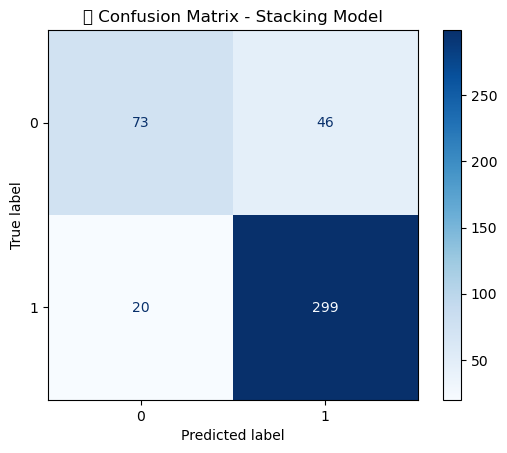

In [110]:
import pandas as pd
import joblib
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

# ✅ 1. Load Preprocessing Pipeline
pipeline = joblib.load('./Preprocessing_pipeline.joblib')

# ✅ 2. Preprocess your train and validation sets
from Feature_Engineering import build_feature_engineering_pipeline

# 1. Reload the raw train data
df_raw = pd.read_csv('./Data/train.csv')
y_train = df_raw['rainfall']
X_raw = df_raw.drop(columns=['rainfall'])

# 2. Apply the exact same feature engineering
columns_to_cap = ['windspeed', 'temparature', 'humidity', 'dewpoint']
fe_pipeline = build_feature_engineering_pipeline(columns_to_cap)
X_engineered = fe_pipeline.fit_transform(X_raw)
X_engineered = X_engineered.loc[:, ~X_engineered.columns.duplicated()]  # drop any duplicates

# 3. Split into train/val (assuming consistent split strategy)
from sklearn.model_selection import train_test_split
X_train_df, X_val_df, y_train, y_val = train_test_split(X_engineered, y_train, test_size=0.2, random_state=42)

# 4. Now apply preprocessing pipeline (it will work now)
X_train_processed = pipeline.transform(X_train_df)
X_val_processed = pipeline.transform(X_val_df)

# 5. Wrap into DataFrames again
feature_names = pipeline.get_feature_names_out()
X_train_processed = pd.DataFrame(X_train_processed, columns=feature_names)
X_val_processed = pd.DataFrame(X_val_processed, columns=feature_names)

print("✅ Feature Engineering and Preprocessing complete. Ready for training.")

# ✅ 4. Define the stacking model (with best parameters)
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=500, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=800, learning_rate=0.0073, max_depth=12,
                          min_child_weight=1, subsample=0.995, colsample_bytree=0.815,
                          gamma=1.266, reg_alpha=4.248, reg_lambda=3.408,
                          objective='binary:logistic', eval_metric='logloss',
                          use_label_encoder=False, random_state=42)),
    ('lgb', LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=10,
                           subsample=0.9, colsample_bytree=0.8, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42)),
    ('svc', SVC(probability=True, C=1, gamma=0.1, kernel='rbf', random_state=42))
]

stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=True,
    cv=5,
    n_jobs=-1
)

# ✅ 5. Re-train the model
print("🚀 Re-training stacking model on preprocessed data...")
stack_model.fit(X_train_processed, y_train)
print("✅ Stacking model training complete.")

# ✅ 6. Evaluate the stacking model
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on validation set
y_val_pred = stack_model.predict(X_val_processed)
y_val_proba = stack_model.predict_proba(X_val_processed)[:, 1]

# Compute metrics
accuracy = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)

print("\n🎯 Final Model Evaluation on Validation Set:")
print(f"   - Accuracy Score: {accuracy:.4f}")
print(f"   - ROC AUC Score:  {roc_auc:.4f}")
print("\n🧾 Classification Report:")
print(classification_report(y_val, y_val_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("📊 Confusion Matrix - Stacking Model")
plt.grid(False)
plt.show()


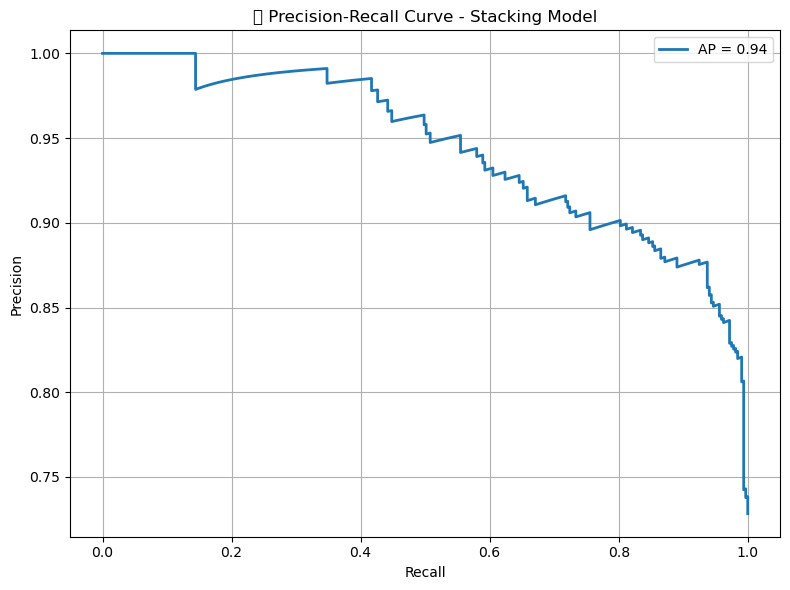

In [111]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Predict probabilities on validation set
y_val_proba = stack_model.predict_proba(X_val_processed)[:, 1]

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_val, y_val_proba)
avg_precision = average_precision_score(y_val, y_val_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('📈 Precision-Recall Curve - Stacking Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


🔍 Evaluating Logistic Regression...
📊 Accuracy: 0.8539
📈 ROC AUC Score: 0.8703
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.63      0.70       119
           1       0.87      0.94      0.90       319

    accuracy                           0.85       438
   macro avg       0.83      0.78      0.80       438
weighted avg       0.85      0.85      0.85       438



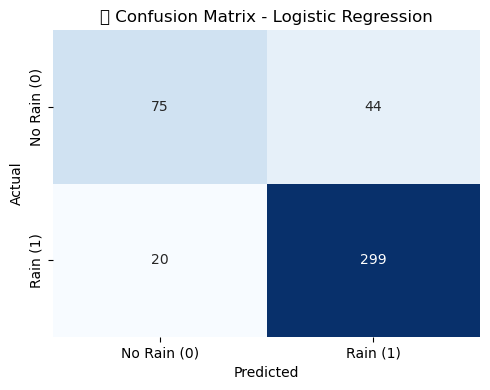


🔍 Evaluating Decision Tree...
📊 Accuracy: 0.8311
📈 ROC AUC Score: 0.8600
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.56      0.64       119
           1       0.85      0.93      0.89       319

    accuracy                           0.83       438
   macro avg       0.80      0.75      0.77       438
weighted avg       0.82      0.83      0.82       438



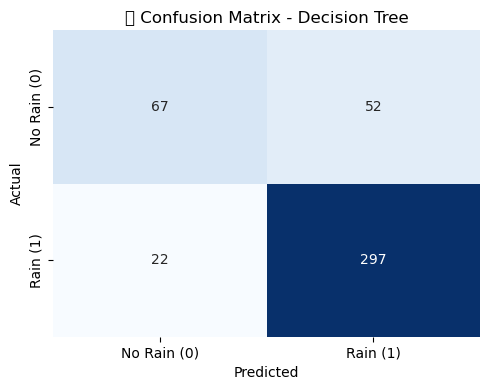


🔍 Evaluating Random Forest...
📊 Accuracy: 0.8584
📈 ROC AUC Score: 0.8645
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.63      0.71       119
           1       0.87      0.94      0.91       319

    accuracy                           0.86       438
   macro avg       0.84      0.79      0.81       438
weighted avg       0.85      0.86      0.85       438



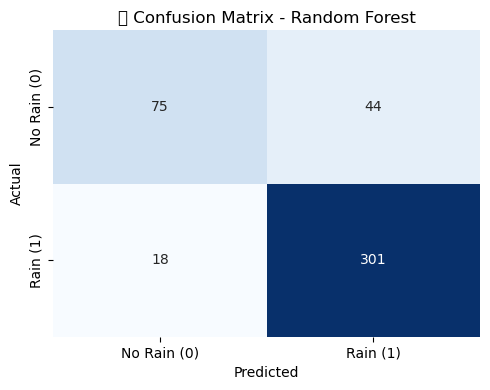


🔍 Evaluating XGBoost...
📊 Accuracy: 0.8516
📈 ROC AUC Score: 0.8607
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.59      0.68       119
           1       0.86      0.95      0.90       319

    accuracy                           0.85       438
   macro avg       0.84      0.77      0.79       438
weighted avg       0.85      0.85      0.84       438



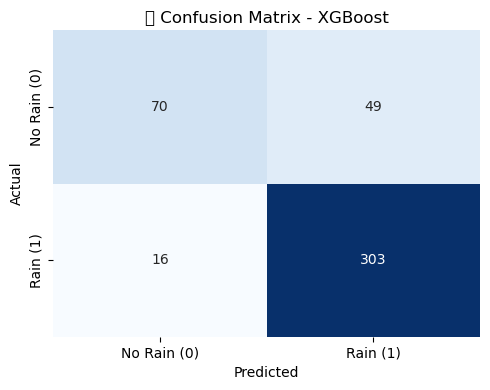


🔍 Evaluating LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1331, number of negative: 421
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27558
[LightGBM] [Info] Number of data points in the train set: 1752, number of used features: 121
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.759703 -> initscore=1.151053
[LightGBM] [Info] Start training from score 1.151053
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

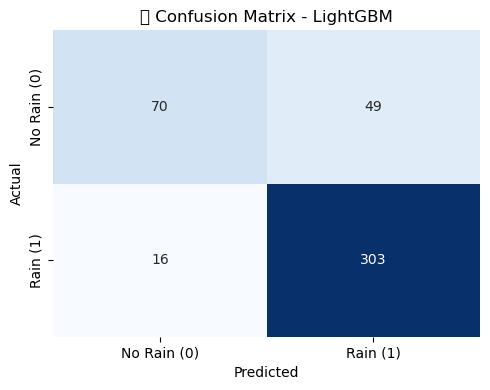


🔍 Evaluating Stacking Ensemble...
📊 Accuracy: 0.8493
📈 ROC AUC Score: 0.8725
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.61      0.69       119
           1       0.87      0.94      0.90       319

    accuracy                           0.85       438
   macro avg       0.83      0.78      0.79       438
weighted avg       0.84      0.85      0.84       438



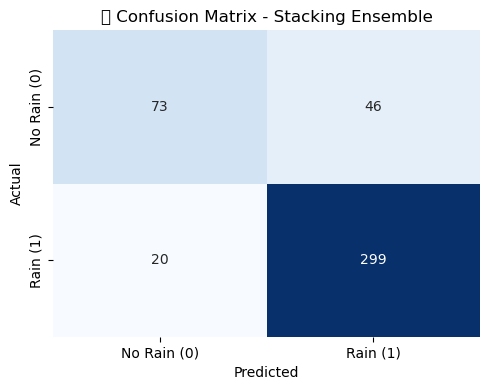

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report, confusion_matrix
)

# 🔁 Models Dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42),  # Or DecisionTreeClassifier()
    "Random Forest": RandomForestClassifier(n_estimators=500, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=800, learning_rate=0.0073, max_depth=12,
                              min_child_weight=1, subsample=0.995, colsample_bytree=0.815,
                              gamma=1.266, reg_alpha=4.248, reg_lambda=3.408,
                              objective='binary:logistic', eval_metric='logloss',
                              use_label_encoder=False, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=10,
                               subsample=0.9, colsample_bytree=0.8, random_state=42),
    "Stacking Ensemble": stack_model
}

# 🎯 Evaluation
for name, model in models.items():
    print(f"\n🔍 Evaluating {name}...")

    if name != "Stacking Ensemble":
        model.fit(X_train_processed, y_train)

    y_pred = model.predict(X_val_processed)
    y_proba = model.predict_proba(X_val_processed)[:, 1]

    acc = accuracy_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_proba)
    report = classification_report(y_val, y_pred)

    print(f"📊 Accuracy: {acc:.4f}")
    print(f"📈 ROC AUC Score: {roc_auc:.4f}")
    print("📋 Classification Report:")
    print(report)

    # ✅ Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Rain (0)', 'Rain (1)'],
                yticklabels=['No Rain (0)', 'Rain (1)'])
    plt.title(f"🧩 Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

In [106]:
# ✅ Evaluate the final stacking model
from sklearn.metrics import accuracy_score, roc_auc_score

# Predict on validation set
y_val_pred = stack_model.predict(X_val_processed)
y_val_proba = stack_model.predict_proba(X_val_processed)[:, 1]

# Compute metrics
accuracy = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)

print(f"🎯 Final Model Evaluation on Validation Set:")
print(f"   - Accuracy Score: {accuracy:.4f}")
print(f"   - ROC AUC Score:  {roc_auc:.4f}")

🎯 Final Model Evaluation on Validation Set:
   - Accuracy Score: 0.8493
   - ROC AUC Score:  0.8725


🎯 Final Model Evaluation on Validation Set:
   - Accuracy Score: 0.8493
   - ROC AUC Score:  0.8725

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.61      0.69       119
           1       0.87      0.94      0.90       319

    accuracy                           0.85       438
   macro avg       0.83      0.78      0.79       438
weighted avg       0.84      0.85      0.84       438



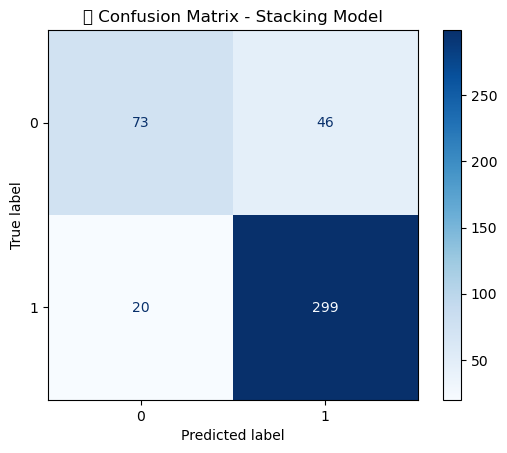

In [109]:
# ✅ Evaluate the final stacking model
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on validation set
y_val_pred = stack_model.predict(X_val_processed)
y_val_proba = stack_model.predict_proba(X_val_processed)[:, 1]

# Compute metrics
accuracy = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)

print("🎯 Final Model Evaluation on Validation Set:")
print(f"   - Accuracy Score: {accuracy:.4f}")
print(f"   - ROC AUC Score:  {roc_auc:.4f}")
print("\n🧾 Classification Report:")
print(classification_report(y_val, y_val_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("📊 Confusion Matrix - Stacking Model")
plt.grid(False)
plt.show()

In [102]:
import pandas as pd
import joblib

from Feature_Engineering import build_feature_engineering_pipeline
from Preprocessing import build_preprocessing_pipeline

# 1. Load raw test set
df_test_raw = pd.read_csv('./Data/test.csv')
df_test_raw = df_test_raw.loc[:, ~df_test_raw.columns.duplicated()]
df_test_raw = df_test_raw.fillna(df_test_raw.median(numeric_only=True))
if 'windspeed_category' in df_test_raw.columns:
    df_test_raw['windspeed_category'] = df_test_raw['windspeed_category'].fillna('Unknown')

# 2. Reapply feature engineering using training pipeline
columns_to_cap = ['windspeed', 'temparature', 'humidity', 'dewpoint']
fe_pipeline = build_feature_engineering_pipeline(columns_to_cap)
df_test_engineered = fe_pipeline.fit_transform(df_test_raw)
df_test_engineered = df_test_engineered.loc[:, ~df_test_engineered.columns.duplicated()]

# 3. Load saved preprocessing pipeline
preprocessing_pipeline = joblib.load('./Preprocessing_pipeline.joblib')

# 4. Apply preprocessing (includes scaling + encoding)
X_test_array = preprocessing_pipeline.transform(df_test_engineered)

# 5. Get feature names & re-wrap into DataFrame
test_feature_names = preprocessing_pipeline.get_feature_names_out()
X_test_aligned = pd.DataFrame(X_test_array, columns=test_feature_names)

# 6. Align test data columns with model's training features
model_feature_names = stack_model.feature_names_in_
for col in model_feature_names:
    if col not in X_test_aligned.columns:
        X_test_aligned[col] = 0

X_test_aligned = X_test_aligned[model_feature_names]
print("✅ Test set fully aligned for prediction. Shape:", X_test_aligned.shape)


✅ Test set fully aligned for prediction. Shape: (730, 121)


In [103]:
# Predict rainfall and probabilities
y_test_pred = stack_model.predict(X_test_aligned)
y_test_proba = stack_model.predict_proba(X_test_aligned)[:, 1]

# View sample
sample_output = pd.DataFrame({
    'id': df_test_raw['id'],
    'Predicted_Rainfall': y_test_pred,
    'Rainfall_Probability': y_test_proba
})
display(sample_output.head())


id  Predicted_Rainfall  Rainfall_Probability
0  2190                   1              0.985173
1  2191                   1              0.986494
2  2192                   1              0.935199
3  2193                   0              0.080844
4  2194                   0              0.034656

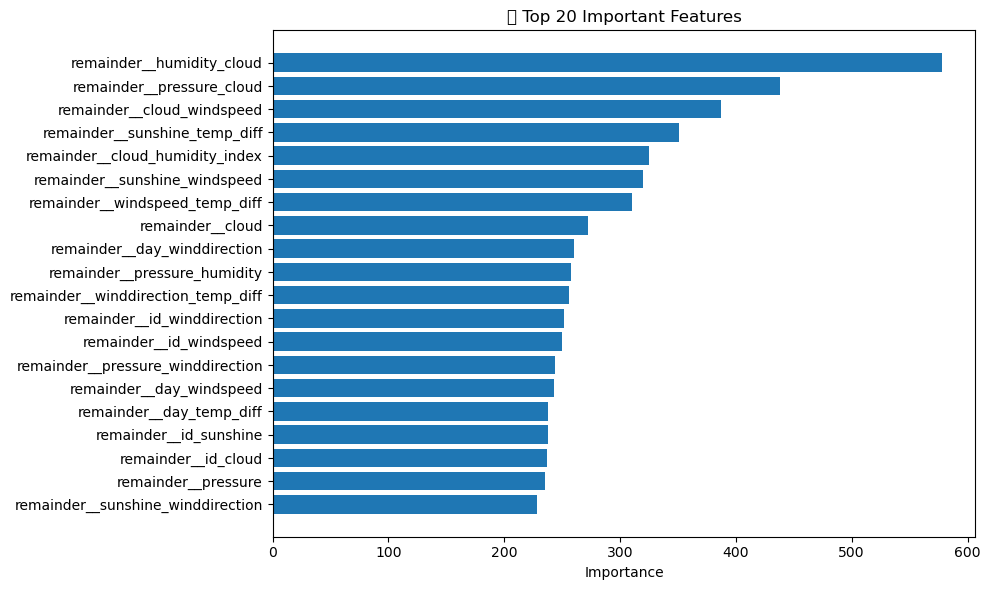

In [104]:
import matplotlib.pyplot as plt

# Extract from a tree-based model (e.g. the LightGBM inside your stacking model)
lgb_model = stack_model.named_estimators_['lgb']  # Replace with correct name
importances = lgb_model.feature_importances_
features = lgb_model.feature_name_

# Plot top features
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'])
plt.gca().invert_yaxis()
plt.title("📊 Top 20 Important Features")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

